In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df_isolator = pd.read_excel("data.xlsx", sheet_name='Data Pengukuran', skiprows=[0], header=3).dropna(how='all').dropna(axis=1, how='all')
df_isolator = df_isolator.iloc[:, :-5]
df_isolator.head()

Waktu Pengukuran  Tegamgan Bocor Isolator Porcelain Disc 0° (V)  \
0  August 2, 2023 at 12:00AM                                           1.74   
1  August 2, 2023 at 12:05AM                                           1.71   
2  August 2, 2023 at 12:10AM                                           1.70   
3  August 2, 2023 at 12:15AM                                           1.76   
4  August 2, 2023 at 12:20AM                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   Polusi Udara (ug/m3)  Arus Bocor Isolator Porcelain Disc 0° (A)  \
0                    16                                   0.000087   
1                    16                                   0.000086   
2                    27                                   0.000085   
3                    21                                   0.000088   
4                    18                                   0.000088   

   Arus Bocor Isolator Porcelain Disc 30° (A)  \
0                                    0.000086   
1                                    0.000086   
2                                    0.000086   
3                                    0.000088   
4                                    0.000086   

   Arus Bocor Isolator Porcelain Disc 60° (A)  \
0                                    0.000088   
1                                    0.000088   
2                                    0.000088   
3                                    0.000088   
4                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0              

In [3]:
df_isolator.rename(columns={'Tegamgan Bocor Isolator Porcelain Disc 0° (V)': 'Tegangan Bocor Isolator Porcelain Disc 0° (V)'}, inplace=True)
df_isolator.head()

Waktu Pengukuran  Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
0  August 2, 2023 at 12:00AM                                           1.74   
1  August 2, 2023 at 12:05AM                                           1.71   
2  August 2, 2023 at 12:10AM                                           1.70   
3  August 2, 2023 at 12:15AM                                           1.76   
4  August 2, 2023 at 12:20AM                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   Polusi Udara (ug/m3)  Arus Bocor Isolator Porcelain Disc 0° (A)  \
0                    16                                   0.000087   
1                    16                                   0.000086   
2                    27                                   0.000085   
3                    21                                   0.000088   
4                    18                                   0.000088   

   Arus Bocor Isolator Porcelain Disc 30° (A)  \
0                                    0.000086   
1                                    0.000086   
2                                    0.000086   
3                                    0.000088   
4                                    0.000086   

   Arus Bocor Isolator Porcelain Disc 60° (A)  \
0                                    0.000088   
1                                    0.000088   
2                                    0.000088   
3                                    0.000088   
4                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0              

In [4]:
df_isolator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Waktu Pengukuran                                10080 non-null  object 
 1   Tegangan Bocor Isolator Porcelain Disc 0° (V)   10080 non-null  float64
 2   Tegangan Bocor Isolator Porcelain Disc 30° (V)  10080 non-null  float64
 3   Tegangan Bocor Isolator Porcelain Disc 60° (V)  10080 non-null  float64
 4   Tegangan Bocor Isolator Porcelain Disc 90° (V)  10080 non-null  float64
 5   Intensitas UV (mW/m2)                           10080 non-null  float64
 6   Intensitas Cahaya (lux)                         10080 non-null  int64  
 7   Kelembaban (%)                                  10080 non-null  float64
 8   Suhu (°C)                                       10080 non-null  float64
 9   Intesitas Hujan (mm)                   

In [5]:
df_isolator['Waktu Pengukuran'].nunique()

10079

In [6]:
df_isolator['Intesitas Hujan (mm)'].unique()

array([0.  , 0.1 , 0.23, 0.03, 0.08, 0.02, 0.21, 1.11, 3.72, 4.06, 4.57,
       4.93, 5.04])

In [7]:
import pandas as pd

# Konversi kolom waktu pengukuran menjadi format datetime
df_isolator['Waktu Pengukuran'] = pd.to_datetime(df_isolator['Waktu Pengukuran'], format='%B %d, %Y at %I:%M%p')

# Membuat kolom terpisah untuk Bulan, Tanggal, Tahun, dan Jam
df_isolator['Month'] = df_isolator['Waktu Pengukuran'].dt.month_name()
df_isolator['Day'] = df_isolator['Waktu Pengukuran'].dt.day
df_isolator['Year'] = df_isolator['Waktu Pengukuran'].dt.year
df_isolator['Time'] = df_isolator['Waktu Pengukuran'].dt.strftime('%I:%M%p')

df_isolator.head()

Waktu Pengukuran  Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
0 2023-08-02 00:00:00                                           1.74   
1 2023-08-02 00:05:00                                           1.71   
2 2023-08-02 00:10:00                                           1.70   
3 2023-08-02 00:15:00                                           1.76   
4 2023-08-02 00:20:00                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   ...  Arus Bocor Isolator Porcelain Disc 60° (A)  \
0  ...                                    0.000088   
1  ...                                    0.000088   
2  ...                                    0.000088   
3  ...                                    0.000088   
4  ...                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0                                         88.0   
1                                         88.0   
2                                         88.0   
3                                         88.0   
4                                         88.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month  Day  Year     Time  
0                                         87.0  August    2  2023  12:00AM  
1                                         87.0  August    2  2023  12:05AM  
2                                         87.0  August    2  2023  12:10AM  
3                                         87.0  August    2  2023  12:15AM  
4                                         87.0  August    2  2023  12:20AM  

[5 rows x 23 columns]

In [8]:
df_isolator = df_isolator.drop(columns='Waktu Pengukuran')

In [9]:
df_isolator.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
0                                           1.74   
1                                           1.71   
2                                           1.70   
3                                           1.76   
4                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   Polusi Udara (ug/m3)  ...  Arus Bocor Isolator Porcelain Disc 60° (A)  \
0                    16  ...                                    0.000088   
1                    16  ...                                    0.000088   
2                    27  ...                                    0.000088   
3                    21  ...                                    0.000088   
4                    18  ...                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0                                         88.0   
1                                         88.0   
2                                         88.0   
3                                         88.0   
4                                         88.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month  Day  Year     Time  
0                                         87.0  August    2  2023  12:00AM  
1                                         87.0  August    2  2023  12:05AM  
2                                         87.0  August    2  2023  12:10AM  
3                                         87.0  August    2  2023  12:15AM  
4                                         87.0  August    2  2023  12:20AM  

[5 rows 

In [10]:
df_isolator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Tegangan Bocor Isolator Porcelain Disc 0° (V)   10080 non-null  float64
 1   Tegangan Bocor Isolator Porcelain Disc 30° (V)  10080 non-null  float64
 2   Tegangan Bocor Isolator Porcelain Disc 60° (V)  10080 non-null  float64
 3   Tegangan Bocor Isolator Porcelain Disc 90° (V)  10080 non-null  float64
 4   Intensitas UV (mW/m2)                           10080 non-null  float64
 5   Intensitas Cahaya (lux)                         10080 non-null  int64  
 6   Kelembaban (%)                                  10080 non-null  float64
 7   Suhu (°C)                                       10080 non-null  float64
 8   Intesitas Hujan (mm)                            10080 non-null  float64
 9   Polusi Udara (ug/m3)                   

In [11]:
df_isolator['Month'].unique()

array(['August', 'September'], dtype=object)

In [12]:
df_isolator['Day'].value_counts()

4     576
5     576
6     576
7     576
8     576
3     576
2     288
28    288
24    288
26    288
27    288
31    288
29    288
30    288
22    288
1     288
23    288
18    288
21    288
20    288
19    288
16    288
15    288
14    288
13    288
12    288
11    288
10    288
9     288
Name: Day, dtype: int64

In [13]:
df_isolator['Year'].unique()

array([2023], dtype=int64)

In [14]:
df_isolator['Time'].unique()

array(['12:00AM', '12:05AM', '12:10AM', '12:15AM', '12:20AM', '12:25AM',
       '12:30AM', '12:35AM', '12:40AM', '12:45AM', '12:50AM', '12:55AM',
       '01:00AM', '01:05AM', '01:10AM', '01:15AM', '01:20AM', '01:25AM',
       '01:30AM', '01:35AM', '01:40AM', '01:45AM', '01:50AM', '01:55AM',
       '02:00AM', '02:05AM', '02:10AM', '02:15AM', '02:20AM', '02:25AM',
       '02:30AM', '02:35AM', '02:40AM', '02:45AM', '02:50AM', '02:55AM',
       '03:00AM', '03:05AM', '03:10AM', '03:15AM', '03:20AM', '03:25AM',
       '03:30AM', '03:35AM', '03:40AM', '03:45AM', '03:50AM', '03:55AM',
       '04:00AM', '04:05AM', '04:10AM', '04:15AM', '04:20AM', '04:25AM',
       '04:30AM', '04:35AM', '04:40AM', '04:45AM', '04:50AM', '04:55AM',
       '05:00AM', '05:05AM', '05:10AM', '05:15AM', '05:20AM', '05:25AM',
       '05:30AM', '05:35AM', '05:40AM', '05:45AM', '05:50AM', '05:55AM',
       '06:00AM', '06:05AM', '06:10AM', '06:15AM', '06:20AM', '06:25AM',
       '06:30AM', '06:35AM', '06:40AM', '06:45AM', 

## Exploratory Data Analysis

In [15]:
# null value

df_isolator.isna().sum()

Tegangan Bocor Isolator Porcelain Disc 0° (V)     0
Tegangan Bocor Isolator Porcelain Disc 30° (V)    0
Tegangan Bocor Isolator Porcelain Disc 60° (V)    0
Tegangan Bocor Isolator Porcelain Disc 90° (V)    0
Intensitas UV (mW/m2)                             0
Intensitas Cahaya (lux)                           0
Kelembaban (%)                                    0
Suhu (°C)                                         0
Intesitas Hujan (mm)                              0
Polusi Udara (ug/m3)                              0
Arus Bocor Isolator Porcelain Disc 0° (A)         0
Arus Bocor Isolator Porcelain Disc 30° (A)        0
Arus Bocor Isolator Porcelain Disc 60° (A)        0
Arus Bocor Isolator Porcelain Disc 90° (A)        0
Arus Bocor Isolator Porcelain Disc 0° (µA)        0
Arus Bocor Isolator Porcelain Disc 30° (µA)       0
Arus Bocor Isolator Porcelain Disc 60° (µA)       0
Arus Bocor Isolator Porcelain Disc 90° (µA)       0
Month                                             0
Day         

In [16]:
df_isolator_EDA = df_isolator.copy()

df_isolator_EDA.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
0                                           1.74   
1                                           1.71   
2                                           1.70   
3                                           1.76   
4                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   Polusi Udara (ug/m3)  ...  Arus Bocor Isolator Porcelain Disc 60° (A)  \
0                    16  ...                                    0.000088   
1                    16  ...                                    0.000088   
2                    27  ...                                    0.000088   
3                    21  ...                                    0.000088   
4                    18  ...                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0                                         88.0   
1                                         88.0   
2                                         88.0   
3                                         88.0   
4                                         88.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month  Day  Year     Time  
0                                         87.0  August    2  2023  12:00AM  
1                                         87.0  August    2  2023  12:05AM  
2                                         87.0  August    2  2023  12:10AM  
3                                         87.0  August    2  2023  12:15AM  
4                                         87.0  August    2  2023  12:20AM  

[5 rows 

In [17]:
df_isolator_EDA['Time'] = df_isolator_EDA['Time'].str.replace('AM', '')
df_isolator_EDA['Time'] = df_isolator_EDA['Time'].str.replace('PM', '')

In [18]:
df_isolator_EDA = df_isolator_EDA.drop(columns='Year')

df_isolator_EDA.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
0                                           1.74   
1                                           1.71   
2                                           1.70   
3                                           1.76   
4                                           1.76   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
0                                            1.71   
1                                            1.71   
2                                            1.71   
3                                            1.77   
4                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
0                                            1.76   
1                                            1.76   
2                                            1.76   
3                                            1.76   
4                                            1.76   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
0                                            1.74                 216.68   
1                                            1.74                 217.58   
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
0                        4           67.84      24.19                   0.0   
1                        4           67.82      24.19                   0.0   
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   

   Polusi Udara (ug/m3)  ...  Arus Bocor Isolator Porcelain Disc 30° (A)  \
0                    16  ...                                    0.000086   
1                    16  ...                                    0.000086   
2                    27  ...                                    0.000086   
3                    21  ...                                    0.000088   
4                    18  ...                                    0.000086   

   Arus Bocor Isolator Porcelain Disc 60° (A)  \
0                                    0.000088   
1                                    0.000088   
2                                    0.000088   
3                                    0.000088   
4                                    0.000088   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
0                                    0.000087   
1                                    0.000087   
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
0                                        87.0   
1                                        85.5   
2                                        85.0   
3                                        88.0   
4                                        88.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
0                                         85.5   
1                                         85.5   
2                                         85.5   
3                                         88.5   
4                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
0                                         88.0   
1                                         88.0   
2                                         88.0   
3                                         88.0   
4                                         88.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month Day   Time  
0                                         87.0  August   2  12:00  
1                                       

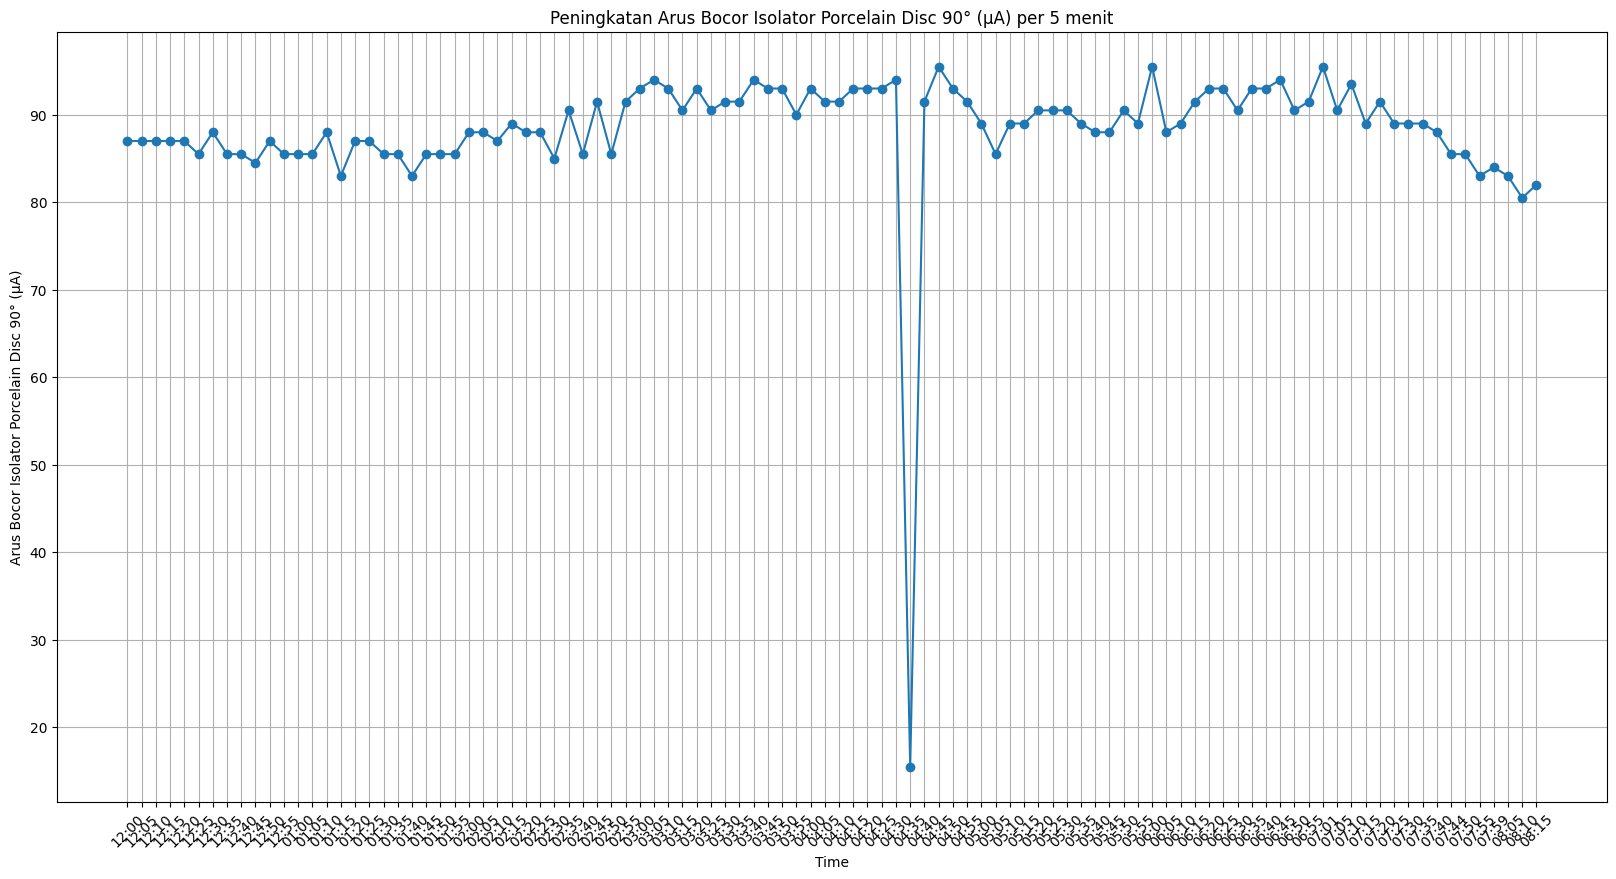

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df_isolator_EDA['Time'][0:100], df_isolator_EDA['Arus Bocor Isolator Porcelain Disc 90° (µA)'][0:100], marker='o')
plt.title('Peningkatan Arus Bocor Isolator Porcelain Disc 90° (µA) per 5 menit')
plt.xlabel('Time')
plt.ylabel('Arus Bocor Isolator Porcelain Disc 90° (µA)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [20]:
df_isolator_EDA.columns

Index(['Tegangan Bocor Isolator Porcelain Disc 0° (V)',
       'Tegangan Bocor Isolator Porcelain Disc 30° (V)',
       'Tegangan Bocor Isolator Porcelain Disc 60° (V)',
       'Tegangan Bocor Isolator Porcelain Disc 90° (V)',
       'Intensitas UV (mW/m2)', 'Intensitas Cahaya (lux)', 'Kelembaban (%)',
       'Suhu (°C)', 'Intesitas Hujan (mm)', 'Polusi Udara (ug/m3)',
       'Arus Bocor Isolator Porcelain Disc 0° (A)',
       'Arus Bocor Isolator Porcelain Disc 30° (A)',
       'Arus Bocor Isolator Porcelain Disc 60° (A)',
       'Arus Bocor Isolator Porcelain Disc 90° (A)',
       'Arus Bocor Isolator Porcelain Disc 0° (µA)',
       'Arus Bocor Isolator Porcelain Disc 30° (µA)',
       'Arus Bocor Isolator Porcelain Disc 60° (µA)',
       'Arus Bocor Isolator Porcelain Disc 90° (µA)', 'Month', 'Day', 'Time'],
      dtype='object')

## Outlier

In [21]:
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def find_outliers(df_isolator_EDA):
    outliers = pd.DataFrame()
    for col in df_isolator_EDA.columns:
        if df_isolator_EDA[col].dtype != 'object':
            Q1 = df_isolator_EDA[col].quantile(0.25)
            Q3 = df_isolator_EDA[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers = df_isolator_EDA[(df_isolator_EDA[col] < lower_bound) | (df_isolator_EDA[col] > upper_bound)]
            outliers = pd.concat([outliers, col_outliers], axis=0)
    return outliers

outliers = find_outliers(df_isolator_EDA)

print("Outliers:")
outliers

Outliers:


Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
593                                            2.70   
641                                            2.80   
3446                                           2.70   
4605                                           2.57   
4606                                           2.61   
...                                             ...   
6914                                           3.79   
6915                                           3.67   
6917                                           3.32   
6919                                           3.32   
6920                                           3.18   

      Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
593                                             2.20   
641                                             2.20   
3446                                            2.20   
4605                                            2.57   
4606                                            2.59   
...                                              ...   
6914                                            3.30   
6915                                            3.81   
6917                                            3.35   
6919                                            3.42   
6920                                            3.23   

      Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
593                                             2.22   
641                                             2.13   
3446                                            2.17   
4605                                            2.61   
4606                                            2.66   
...                                              ...   
6914                                            3.96   
6915                                            3.69   
6917                                            3.32   
6919                                            3.37   
6920                                            3.23   

      Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
593                                             2.20                 214.88   
641                                             2.13                 209.68   
3446                                            2.20                 216.68   
4605                                            2.52                 214.88   
4606                                            2.52                 218.50   
...                                              ...                    ...   
6914                                            3.79                 220.81   
6915                                            3.64                 219.88   
6917                                            3.35                 223.18   
6919                                            3.40                 222.23   
6920                                            3.21                 221.28   

      Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
593                         7           77.17      22.66   
641                         7           78.24      21.39   
3446                        7           76.58      25.92   
4605                        7           79.72      25.36   
4606                        7           79.62      25.35   
...                       ...             ...        ...   
6914                        7           78.67      25.29   
6915                        7           77.80      25.24   
6917                        7           77.60      25.04   
6919                        7           78.50      24.87   
6920                        7           78.54      24.78   

      Intesitas Hujan (mm)  Polusi Udara (ug/m3)  ...  \
593                    0.0                    52  ...   
641                    0.0                    63  ...   
3446                   0.0                    88  ...   
4605                   0.0                    70  ...   
4606                   0.0                  

## Dataframe sebelum dibuang outlier

array([[<AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 0° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 30° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 60° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 90° (V)'}>],
       [<AxesSubplot: title={'center': 'Intensitas UV (mW/m2)'}>,
        <AxesSubplot: title={'center': 'Intensitas Cahaya (lux)'}>,
        <AxesSubplot: title={'center': 'Kelembaban (%)'}>,
        <AxesSubplot: title={'center': 'Suhu (°C)'}>],
       [<AxesSubplot: title={'center': 'Intesitas Hujan (mm)'}>,
        <AxesSubplot: title={'center': 'Polusi Udara (ug/m3)'}>,
        <AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 0° (A)'}>,
        <AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 30° (A)'}>],
       [<AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 60° (A)'}

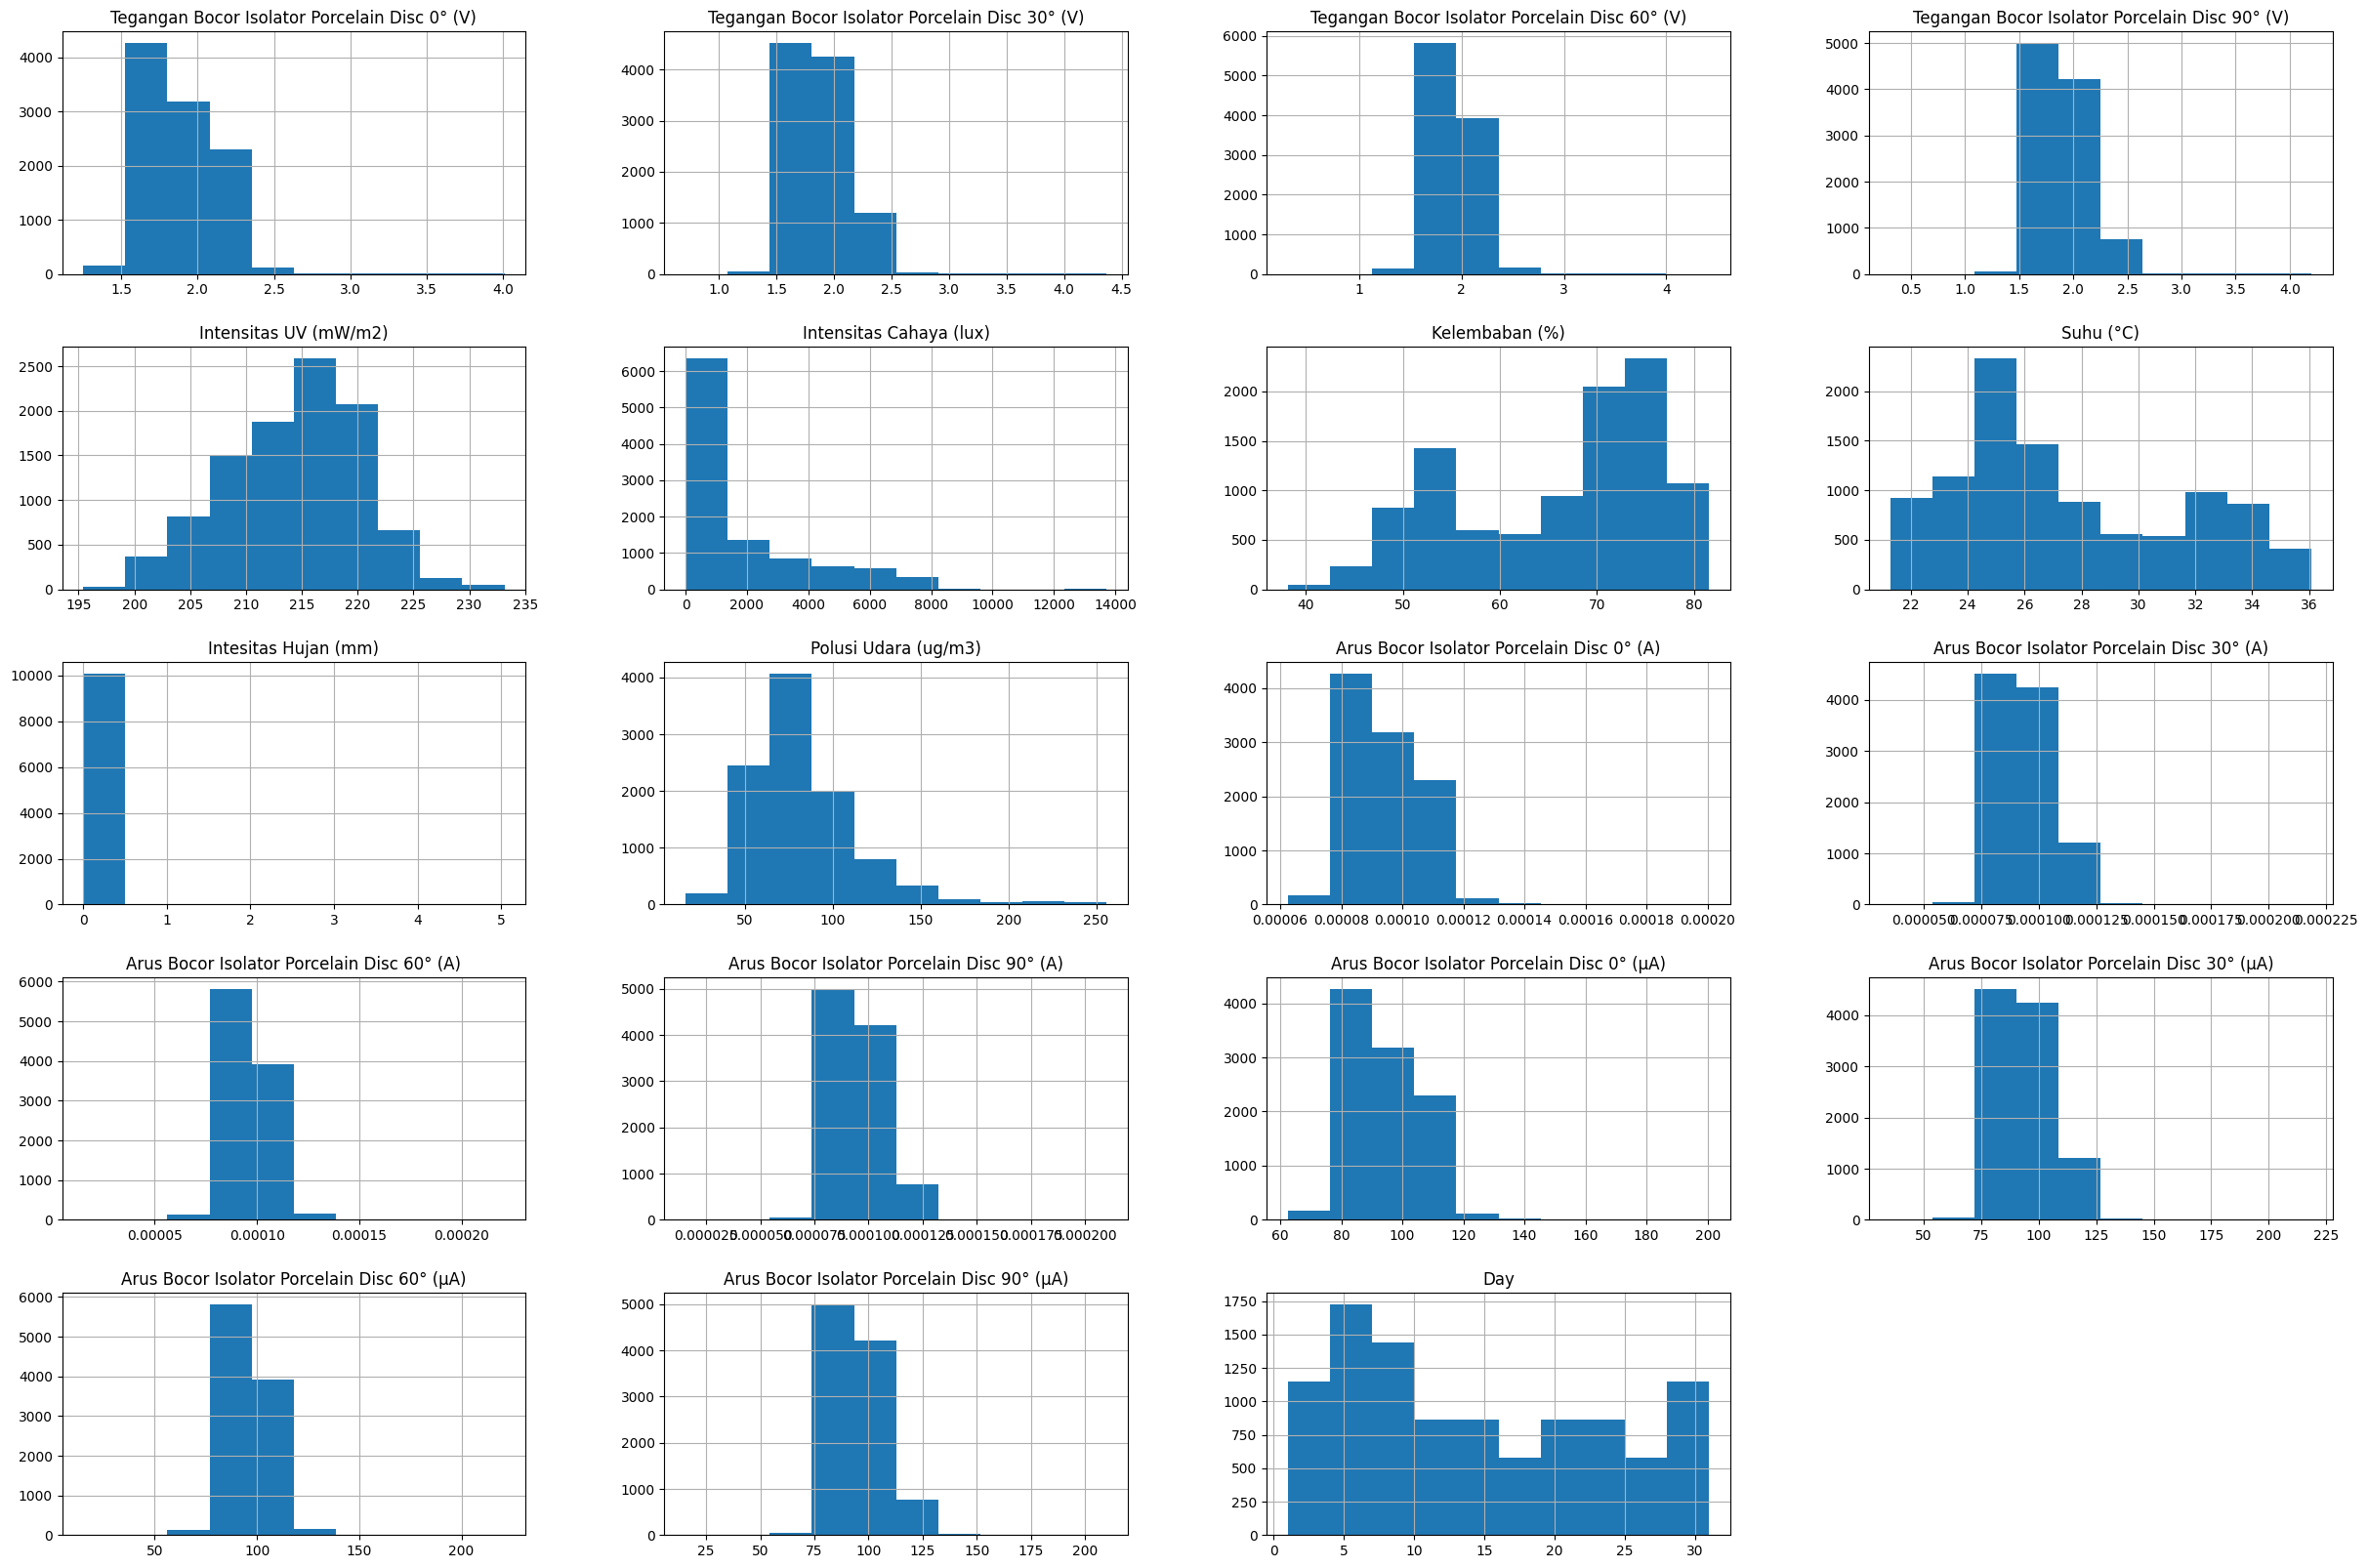

In [22]:
df_isolator_EDA.hist(figsize=(30, 20))

## Dataframe setelah dibuang dari outlier

DataFrame setelah menghapus outliers:


array([[<AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 0° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 30° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 60° (V)'}>,
        <AxesSubplot: title={'center': 'Tegangan Bocor Isolator Porcelain Disc 90° (V)'}>],
       [<AxesSubplot: title={'center': 'Intensitas UV (mW/m2)'}>,
        <AxesSubplot: title={'center': 'Intensitas Cahaya (lux)'}>,
        <AxesSubplot: title={'center': 'Kelembaban (%)'}>,
        <AxesSubplot: title={'center': 'Suhu (°C)'}>],
       [<AxesSubplot: title={'center': 'Intesitas Hujan (mm)'}>,
        <AxesSubplot: title={'center': 'Polusi Udara (ug/m3)'}>,
        <AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 0° (A)'}>,
        <AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 30° (A)'}>],
       [<AxesSubplot: title={'center': 'Arus Bocor Isolator Porcelain Disc 60° (A)'}

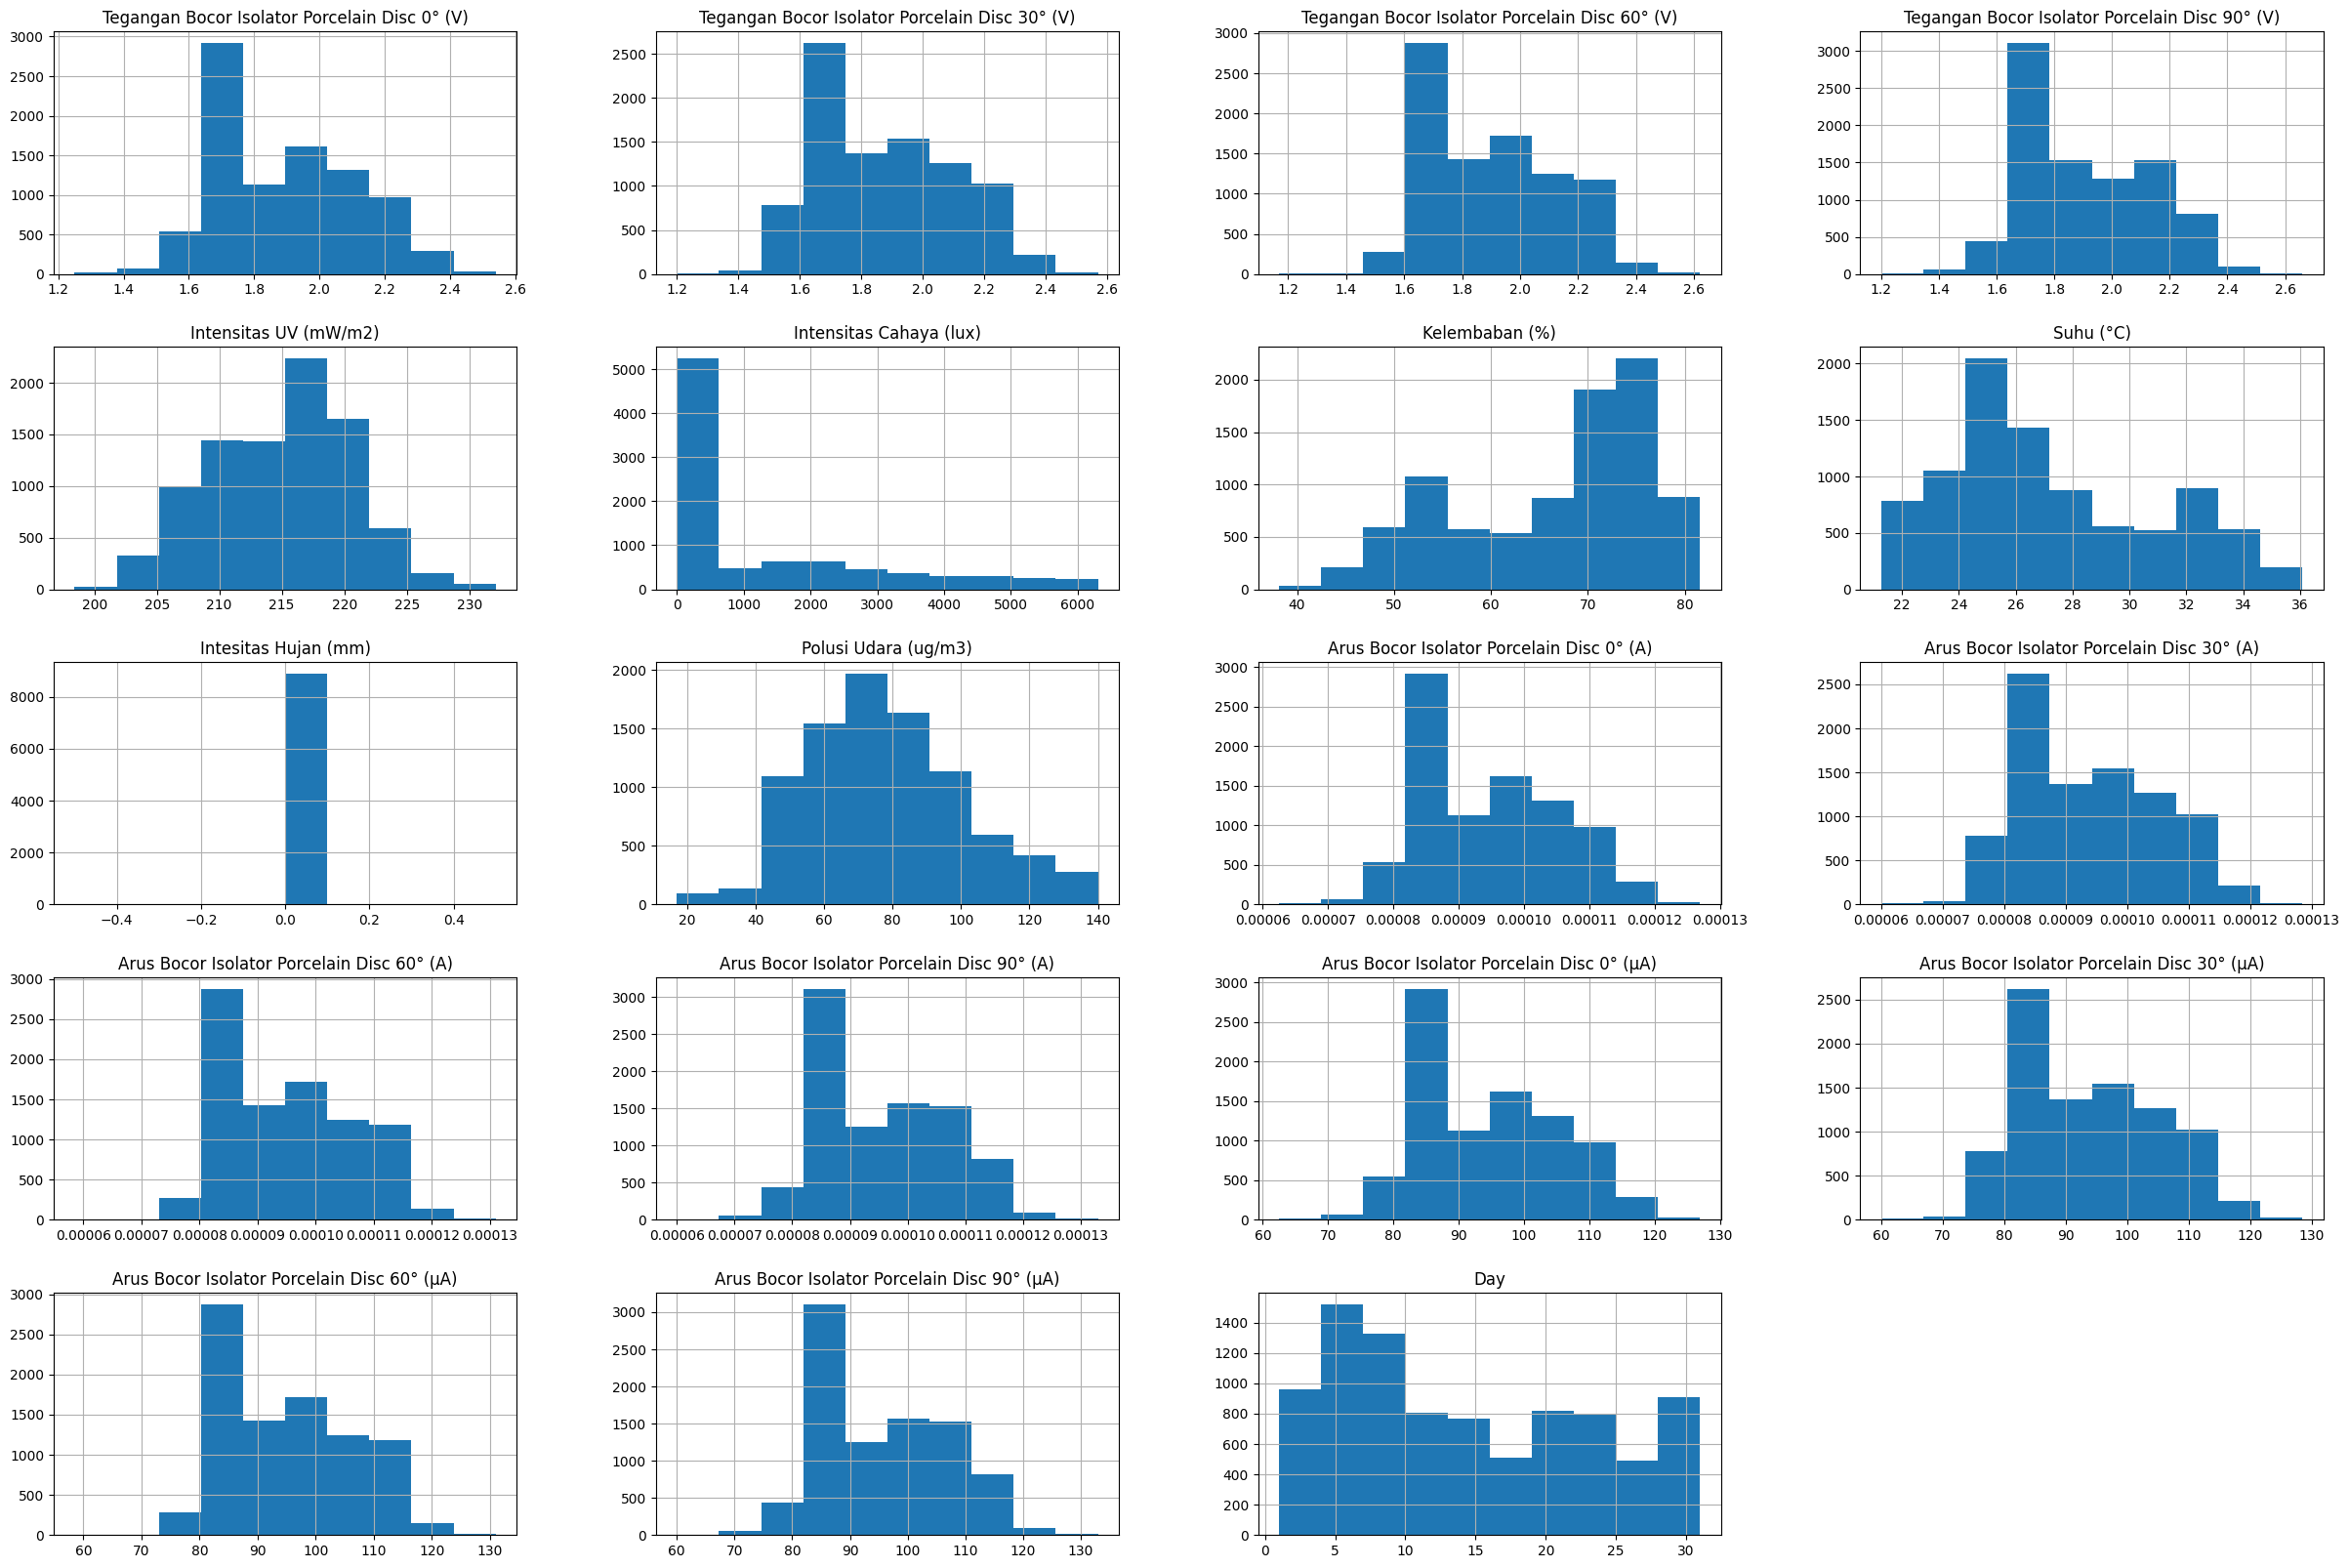

In [23]:
df_isolator_EDA_wo_outliers = df_isolator_EDA.copy()

# Buang outliers dari df_isolator_EDA
def remove_outliers(df_isolator_EDA_wo_outliers):
    outliers = find_outliers(df_isolator_EDA_wo_outliers)
    df_isolator_EDA_wo_outliers = df_isolator_EDA_wo_outliers.drop(outliers.index)
    return df_isolator_EDA_wo_outliers

df_isolator_EDA_wo_outliers = remove_outliers(df_isolator_EDA_wo_outliers)

print("DataFrame setelah menghapus outliers:")
df_isolator_EDA_wo_outliers.hist(figsize=(30, 20))

## Preprocessing Data

In [24]:
df_processing = df_isolator_EDA_wo_outliers.copy()

df_processing.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
2                                           1.70   
3                                           1.76   
4                                           1.76   
5                                           1.74   
7                                           1.70   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
2                                            1.71   
3                                            1.77   
4                                            1.71   
5                                            1.71   
7                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
2                                            1.76   
3                                            1.76   
4                                            1.76   
5                                            1.74   
7                                            1.74   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   
5                                            1.71                 212.68   
7                                            1.71                 213.56   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   
5                        4           67.74      24.24                   0.0   
7                        4           67.71      24.25                   0.0   

   Polusi Udara (ug/m3)  ...  Arus Bocor Isolator Porcelain Disc 30° (A)  \
2                    27  ...                                    0.000086   
3                    21  ...                                    0.000088   
4                    18  ...                                    0.000086   
5                    22  ...                                    0.000086   
7                    18  ...                                    0.000086   

   Arus Bocor Isolator Porcelain Disc 60° (A)  \
2                                    0.000088   
3                                    0.000088   
4                                    0.000088   
5                                    0.000087   
7                                    0.000087   

   Arus Bocor Isolator Porcelain Disc 90° (A)  \
2                                    0.000087   
3                                    0.000087   
4                                    0.000087   
5                                    0.000086   
7                                    0.000086   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
2                                        85.0   
3                                        88.0   
4                                        88.0   
5                                        87.0   
7                                        85.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
2                                         85.5   
3                                         88.5   
4                                         85.5   
5                                         85.5   
7                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
2                                         88.0   
3                                         88.0   
4                                         88.0   
5                                         87.0   
7                                         87.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month Day   Time  
2                                         87.0  August   2  12:10  
3                                       

In [25]:
df_processing = df_processing.drop(df_processing.columns[10:14], axis=1)

df_processing.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
2                                           1.70   
3                                           1.76   
4                                           1.76   
5                                           1.74   
7                                           1.70   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
2                                            1.71   
3                                            1.77   
4                                            1.71   
5                                            1.71   
7                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
2                                            1.76   
3                                            1.76   
4                                            1.76   
5                                            1.74   
7                                            1.74   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   
5                                            1.71                 212.68   
7                                            1.71                 213.56   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Intesitas Hujan (mm)  \
2                        4           67.79      24.20                   0.0   
3                        4           67.77      24.23                   0.0   
4                        4           67.74      24.23                   0.0   
5                        4           67.74      24.24                   0.0   
7                        4           67.71      24.25                   0.0   

   Polusi Udara (ug/m3)  Arus Bocor Isolator Porcelain Disc 0° (µA)  \
2                    27                                        85.0   
3                    21                                        88.0   
4                    18                                        88.0   
5                    22                                        87.0   
7                    18                                        85.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
2                                         85.5   
3                                         88.5   
4                                         85.5   
5                                         85.5   
7                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
2                                         88.0   
3                                         88.0   
4                                         88.0   
5                                         87.0   
7                                         87.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month  Day   Time  
2                                         87.0  August    2  12:10  
3                                         87.0  August    2  12:15  
4                                         87.0  August    2  12:20  
5                                         85.5  August    2  12:25  
7                                         85.5  August    2  12:35

In [26]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8895 entries, 2 to 10079
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Tegangan Bocor Isolator Porcelain Disc 0° (V)   8895 non-null   float64
 1   Tegangan Bocor Isolator Porcelain Disc 30° (V)  8895 non-null   float64
 2   Tegangan Bocor Isolator Porcelain Disc 60° (V)  8895 non-null   float64
 3   Tegangan Bocor Isolator Porcelain Disc 90° (V)  8895 non-null   float64
 4   Intensitas UV (mW/m2)                           8895 non-null   float64
 5   Intensitas Cahaya (lux)                         8895 non-null   int64  
 6   Kelembaban (%)                                  8895 non-null   float64
 7   Suhu (°C)                                       8895 non-null   float64
 8   Intesitas Hujan (mm)                            8895 non-null   float64
 9   Polusi Udara (ug/m3)                    

In [27]:
df_processing.describe()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
count                                    8895.000000   
mean                                        1.891659   
std                                         0.217972   
min                                         1.250000   
25%                                         1.710000   
50%                                         1.860000   
75%                                         2.050000   
max                                         2.540000   

       Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
count                                     8895.000000   
mean                                         1.878570   
std                                          0.221038   
min                                          1.200000   
25%                                          1.690000   
50%                                          1.860000   
75%                                          2.050000   
max                                          2.570000   

       Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
count                                     8895.000000   
mean                                         1.902770   
std                                          0.222115   
min                                          1.170000   
25%                                          1.710000   
50%                                          1.880000   
75%                                          2.080000   
max                                          2.620000   

       Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
count                                     8895.000000            8895.000000   
mean                                         1.906171             215.005822   
std                                          0.228346               5.560340   
min                                          1.200000             198.420000   
25%                                          1.710000             210.950000   
50%                                          1.880000             215.330000   
75%                                          2.100000             218.960000   
max                                          2.660000             232.120000   

       Intensitas Cahaya (lux)  Kelembaban (%)    Suhu (°C)  \
count              8895.000000     8895.000000  8895.000000   
mean               1233.728387       66.608393    27.177149   
std                1741.913648        9.977064     3.605599   
min                   0.000000       38.140000    21.270000   
25%                   7.000000       57.670000    24.425000   
50%                  10.000000       70.080000    26.180000   
75%                2148.000000       74.740000    29.915000   
max                6304.000000       81.580000    36.080000   

       Intesitas Hujan (mm)  Polusi Udara (ug/m3)  \
count                8895.0           8895.000000   
mean                    0.0             78.283642   
std                     0.0             23.007892   
min                     0.0             17.000000   
25%                     0.0             61.000000   
50%                     0.0             76.000000   
75%                     0.0             92.000000   
max                     0.0            140.000000   

       Arus Bocor Isolator Porcelain Disc 0° (µA)  \
count                                 8895.000000   
mean                                    94.582968   
std                                     10.898611   
min                                     62.500000   
25%                                     85.500000   
50%                                     93.000000   
75%                                    102.500000   
max                                    127.000000   

       Arus Bocor Isolator Porcelain Disc 30° (µA)  \
count                                  8895.000000   
mean                                     93.928499   
std                                      11.051894   
min          

In [28]:
df_processing.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_17276\35562182.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processing.corr()


Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
Tegangan Bocor Isolator Porcelain Disc 0° (V)                                        1.000000   
Tegangan Bocor Isolator Porcelain Disc 30° (V)                                       0.979044   
Tegangan Bocor Isolator Porcelain Disc 60° (V)                                       0.966978   
Tegangan Bocor Isolator Porcelain Disc 90° (V)                                       0.962477   
Intensitas UV (mW/m2)                                                                0.431104   
Intensitas Cahaya (lux)                                                             -0.636599   
Kelembaban (%)                                                                       0.856705   
Suhu (°C)                                                                           -0.693685   
Intesitas Hujan (mm)                                                                      NaN   
Polusi Udara (ug/m3)                                                                 0.300861   
Arus Bocor Isolator Porcelain Disc 0° (µA)                                           1.000000   
Arus Bocor Isolator Porcelain Disc 30° (µA)                                          0.979044   
Arus Bocor Isolator Porcelain Disc 60° (µA)                                          0.966978   
Arus Bocor Isolator Porcelain Disc 90° (µA)                                          0.962477   
Day                                                                                  0.129590   

                                                Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
Tegangan Bocor Isolator Porcelain Disc 0° (V)                                         0.979044   
Tegangan Bocor Isolator Porcelain Disc 30° (V)                                        1.000000   
Tegangan Bocor Isolator Porcelain Disc 60° (V)                                        0.967894   
Tegangan Bocor Isolator Porcelain Disc 90° (V)                                        0.962714   
Intensitas UV (mW/m2)                                                                 0.432579   
Intensitas Cahaya (lux)                                                              -0.640925   
Kelembaban (%)                                                                        0.861809   
Suhu (°C)                                                                            -0.699082   
Intesitas Hujan (mm)                                                                       NaN   
Polusi Udara (ug/m3)                                                                  0.295890   
Arus Bocor Isolator Porcelain Disc 0° (µA)                                            0.979044   
Arus Bocor Isolator Porcelain Disc 30° (µA)                                           1.000000   
Arus Bocor Isolator Porcelain Disc 60° (µA)                                           0.967894   
Arus Bocor Isolator Porcelain Disc 90° (µA)                                           0.962714   
Day                                                                                   0.121057   

                                                Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
Tegangan Bocor Isolator Porcelain Disc 0° (V)                                         0.966978   
Tegangan Bocor Isolator Porcelain Disc 30° (V)                                        0.967894   
Tegangan Bocor Isolator Porcelain Disc 60° (V)                                        1.000000   
Tegangan Bocor Isolator Porcelain Disc 90° (V)                                        0.966443   
Intensitas UV (mW/m2)                                                                 0.440560   
Intensitas Cahaya (lux)                                                              -0.648493   
Kelembaban (%)                                                                        0.863410   
Suhu (°C)                                                                            -0.708448   
Intesitas Hujan (mm)                        

In [29]:
df_processing.isna().sum()

Tegangan Bocor Isolator Porcelain Disc 0° (V)     0
Tegangan Bocor Isolator Porcelain Disc 30° (V)    0
Tegangan Bocor Isolator Porcelain Disc 60° (V)    0
Tegangan Bocor Isolator Porcelain Disc 90° (V)    0
Intensitas UV (mW/m2)                             0
Intensitas Cahaya (lux)                           0
Kelembaban (%)                                    0
Suhu (°C)                                         0
Intesitas Hujan (mm)                              0
Polusi Udara (ug/m3)                              0
Arus Bocor Isolator Porcelain Disc 0° (µA)        0
Arus Bocor Isolator Porcelain Disc 30° (µA)       0
Arus Bocor Isolator Porcelain Disc 60° (µA)       0
Arus Bocor Isolator Porcelain Disc 90° (µA)       0
Month                                             0
Day                                               0
Time                                              0
dtype: int64

In [30]:
df_processing['Intesitas Hujan (mm)'].unique()

array([0.])

In [31]:
# drop kolom intensitas hujan

df_processing = df_processing.drop(columns='Intesitas Hujan (mm)')

df_processing.head()

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
2                                           1.70   
3                                           1.76   
4                                           1.76   
5                                           1.74   
7                                           1.70   

   Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
2                                            1.71   
3                                            1.77   
4                                            1.71   
5                                            1.71   
7                                            1.71   

   Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
2                                            1.76   
3                                            1.76   
4                                            1.76   
5                                            1.74   
7                                            1.74   

   Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
2                                            1.74                 213.56   
3                                            1.74                 218.50   
4                                            1.74                 211.38   
5                                            1.71                 212.68   
7                                            1.71                 213.56   

   Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  Polusi Udara (ug/m3)  \
2                        4           67.79      24.20                    27   
3                        4           67.77      24.23                    21   
4                        4           67.74      24.23                    18   
5                        4           67.74      24.24                    22   
7                        4           67.71      24.25                    18   

   Arus Bocor Isolator Porcelain Disc 0° (µA)  \
2                                        85.0   
3                                        88.0   
4                                        88.0   
5                                        87.0   
7                                        85.0   

   Arus Bocor Isolator Porcelain Disc 30° (µA)  \
2                                         85.5   
3                                         88.5   
4                                         85.5   
5                                         85.5   
7                                         85.5   

   Arus Bocor Isolator Porcelain Disc 60° (µA)  \
2                                         88.0   
3                                         88.0   
4                                         88.0   
5                                         87.0   
7                                         87.0   

   Arus Bocor Isolator Porcelain Disc 90° (µA)   Month  Day   Time  
2                                         87.0  August    2  12:10  
3                                         87.0  August    2  12:15  
4                                         87.0  August    2  12:20  
5                                         85.5  August    2  12:25  
7                                         85.5  August    2  12:35

In [32]:
df_processing

Tegangan Bocor Isolator Porcelain Disc 0° (V)  \
2                                               1.70   
3                                               1.76   
4                                               1.76   
5                                               1.74   
7                                               1.70   
...                                              ...   
10075                                           2.00   
10076                                           2.17   
10077                                           2.25   
10078                                           2.25   
10079                                           2.25   

       Tegangan Bocor Isolator Porcelain Disc 30° (V)  \
2                                                1.71   
3                                                1.77   
4                                                1.71   
5                                                1.71   
7                                                1.71   
...                                               ...   
10075                                            2.20   
10076                                            2.20   
10077                                            2.17   
10078                                            2.20   
10079                                            2.25   

       Tegangan Bocor Isolator Porcelain Disc 60° (V)  \
2                                                1.76   
3                                                1.76   
4                                                1.76   
5                                                1.74   
7                                                1.74   
...                                               ...   
10075                                            2.25   
10076                                            2.20   
10077                                            2.25   
10078                                            2.22   
10079                                            2.25   

       Tegangan Bocor Isolator Porcelain Disc 90° (V)  Intensitas UV (mW/m2)  \
2                                                1.74                 213.56   
3                                                1.74                 218.50   
4                                                1.74                 211.38   
5                                                1.71                 212.68   
7                                                1.71                 213.56   
...                                               ...                    ...   
10075                                            2.27                 213.12   
10076                                            2.20                 220.35   
10077                                            2.20                 221.28   
10078                                            2.27                 219.88   
10079                                            2.25                 218.96   

       Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
2                            4           67.79      24.20   
3                            4           67.77      24.23   
4                            4           67.74      24.23   
5                            4           67.74      24.24   
7                            4           67.71      24.25   
...                        ...             ...        ...   
10075                        7           76.80      24.33   
10076                        7           76.75      24.31   
10077                        6           76.82      24.23   
10078                        7           76.98      24.23   
10079                        6           76.90      24.18   

       Polusi Udara (ug/m3)  Arus Bocor Isolator Porcelain Disc 0° (µA)  \
2                        27                                        85.0   
3                        21                                        88.0   
4                        18                  

## Tegangan Bocor Isolator Porcelain Disc 0° (V)

In [33]:
# Split data menjadi train dan test

to_drop = df_processing.columns[0:4].tolist()
to_drop.extend(df_processing.columns[9:16])
x_0 = df_processing.drop(to_drop, axis=1)
y_0 = df_processing['Arus Bocor Isolator Porcelain Disc 0° (µA)']

xtrain_0,xtest_0,ytrain_0,ytest_0 = train_test_split(
    x_0,
    y_0,
    test_size=0.2
)

xtrain_0.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  \
5724                 216.23                        0           76.29   
6464                 210.95                     3402           60.31   
82                   210.95                      407           72.70   
9764                 223.66                        6           74.72   
1411                 224.62                        7           70.59   

      Suhu (°C)  Polusi Udara (ug/m3)  
5724      26.16                    90  
6464      29.65                   105  
82        22.34                    46  
9764      25.39                   117  
1411      26.16                    99

In [34]:
ytrain_0

5724    116.0
6464     79.5
82       90.5
9764    106.5
1411     98.0
        ...  
5690     88.0
3156    108.5
2605    100.0
9046     83.0
2282    100.0
Name: Arus Bocor Isolator Porcelain Disc 0° (µA), Length: 7116, dtype: float64

In [35]:
# Regresi Linier
model = LinearRegression()

# Inisialisasi model Regresi Linier
model.fit(xtrain_0, ytrain_0)

# Lakukan prediksi pada set pengujian
predictions = model.predict(xtest_0)

# Hitung nilai RMSE
rmse = mean_squared_error(ytest_0, predictions, squared=False)

# Hitung nilai MAE
mae = mean_absolute_error(ytest_0, predictions)

# Hitung nilai MAPE
mape = mean_absolute_percentage_error(ytest_0, predictions)

# Tampilkan hasil evaluasi
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 5.257373026308504
MAE: 4.1247673923464125
MAPE: 0.044357186100459974


In [36]:
print('R squared: {:.2f}'.format(model.score(x_0,y_0)*100))

R squared: 76.77


In [37]:
df_results_0 = pd.DataFrame({'Actual': ytest_0, 'Predicted': predictions})

df_results_0

Actual   Predicted
5521   115.0  109.588454
9445    89.0   97.286560
912    107.5  103.216118
2283   105.0  105.963854
7385    83.0   79.141473
...      ...         ...
758     82.0   83.902947
323     91.5   97.588896
9369    80.5   76.812609
9944    85.5   76.095471
7920    84.5   82.576467

[1779 rows x 2 columns]

In [38]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x_0, model.coef_))

Intercept:  -50.88650824599506
Coefficients:


[('Intensitas UV (mW/m2)', 0.10032313344935677),
 ('Intensitas Cahaya (lux)', 0.0008125304288293311),
 ('Kelembaban (%)', 1.4274562846010364),
 ('Suhu (°C)', 1.1493427468784327),
 ('Polusi Udara (ug/m3)', -0.04383018098175723)]

In [39]:
df_predictions = pd.DataFrame(predictions, columns=['Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)'])

df_scatter = pd.concat([xtest_0, df_predictions], axis=1)

xtest_0.reset_index(drop=True, inplace=True)

df_scatter_0 = pd.concat([xtest_0, df_predictions], axis=1)

df_scatter_0.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
0                 219.88                        7           79.59      24.78   
1                 220.35                        0           68.78      27.39   
2                 214.44                        7           76.92      21.73   
3                 217.13                        7           76.15      25.91   
4                 210.10                     4919           47.49      34.47   

   Polusi Udara (ug/m3)  Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)  
0                    84                                         109.588454     
1                    82                                          97.286560     
2                    50                                         103.216118     
3                    78                                         105.963854     
4                    56                                          79.141473

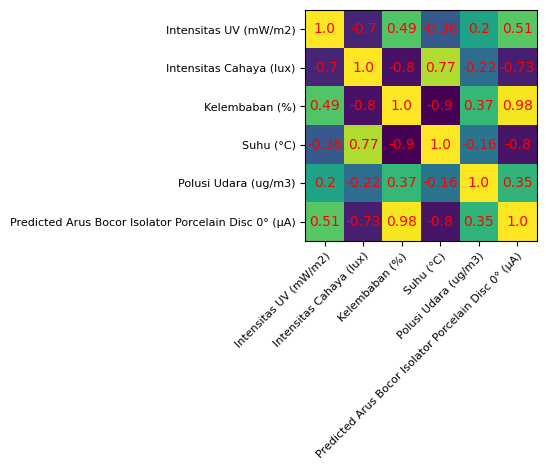

In [40]:
corr_0 = df_scatter_0.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr_0.values)

ax.set_xticks(np.arange(len(corr_0.columns)))
ax.set_yticks(np.arange(len(corr_0.columns)))
ax.set_xticklabels(corr_0.columns, fontsize=8)
ax.set_yticklabels(corr_0.columns, fontsize=8)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

for i in range(len(corr_0.columns)):
    for j in range(len(corr_0.columns)):
        text = ax.text(j, i, np.around(corr_0.iloc[i, j], decimals=2), ha="center", va="center", color="red", fontsize=10)
plt.tight_layout()
# plt.savefig("heatmap.png", bbox_inches = 'tight', dpi=300)
plt.show()

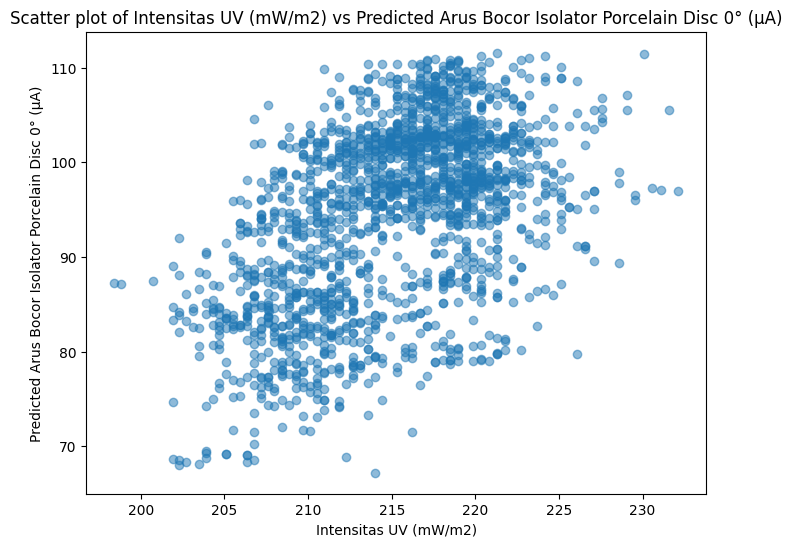

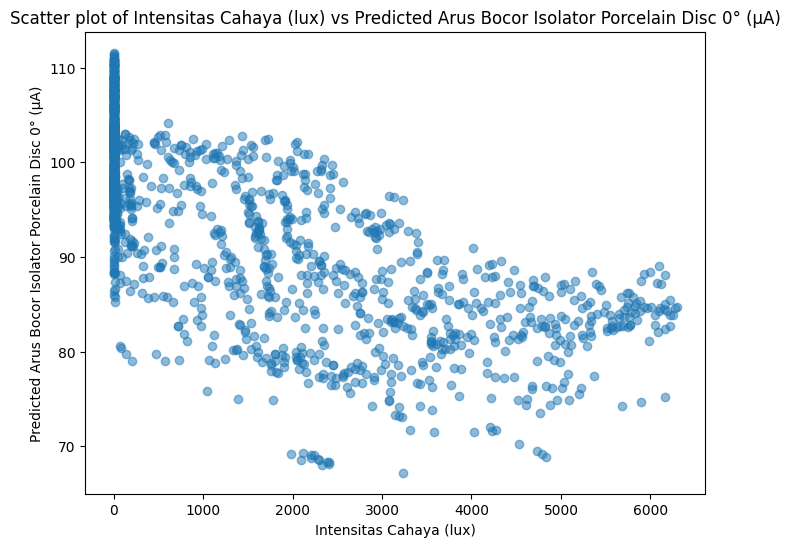

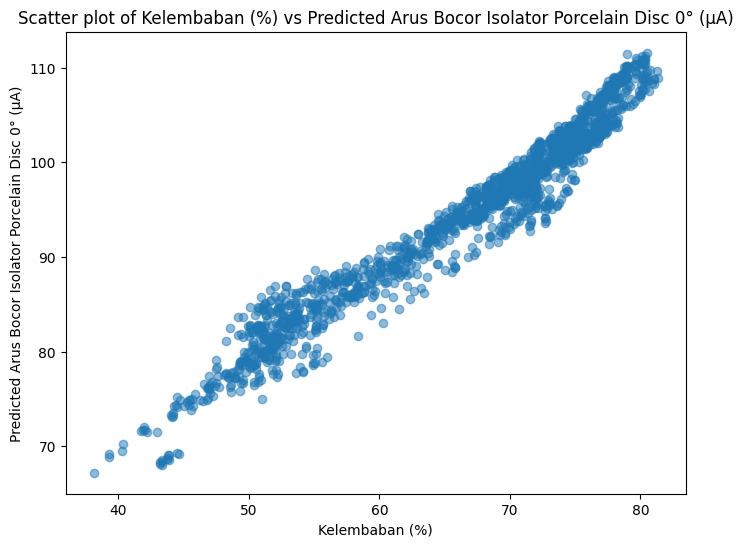

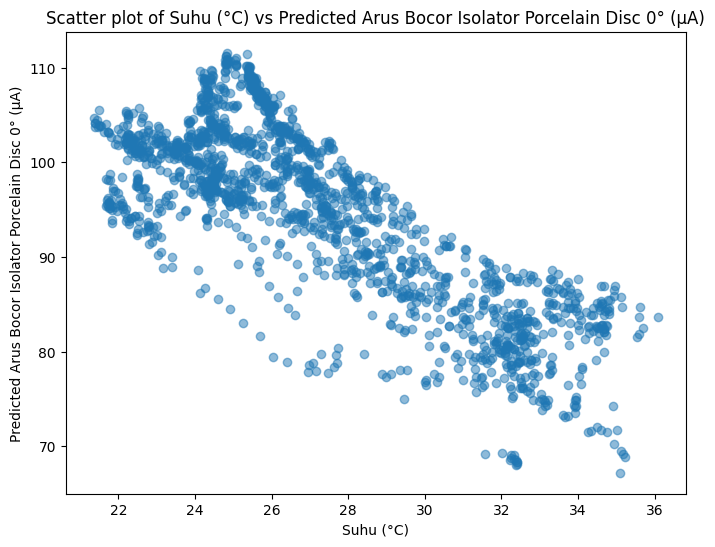

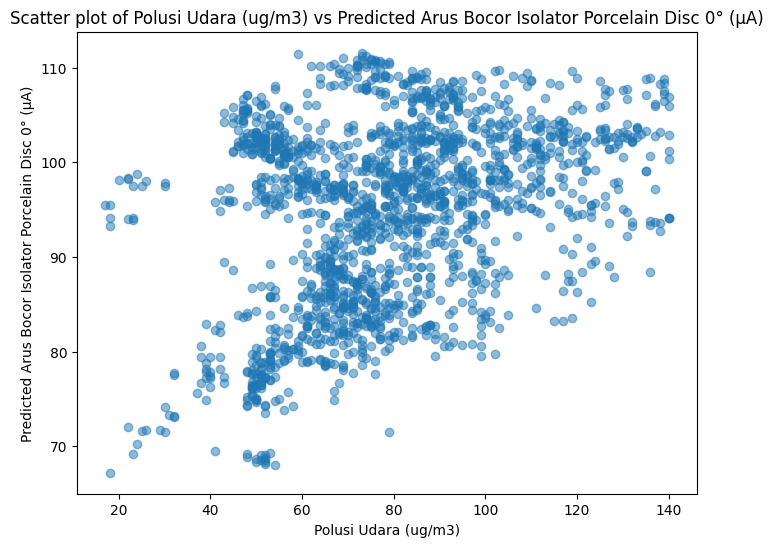

In [41]:
# Membuat scatter plot untuk tiap faktor
factors = ['Intensitas UV (mW/m2)', 'Intensitas Cahaya (lux)', 'Kelembaban (%)', 'Suhu (°C)', 'Polusi Udara (ug/m3)']
for factor in factors:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scatter_0[factor], df_scatter_0['Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)'], alpha=0.5)
    plt.title(f'Scatter plot of {factor} vs Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)')
    plt.xlabel(factor)
    plt.ylabel('Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)')
    plt.show()

## Tegangan Bocor Isolator Porcelain Disc 30° (V)

In [42]:
# Split data menjadi train dan test

to_drop = df_processing.columns[0:4].tolist()
to_drop.extend(df_processing.columns[9:16])
x_30 = df_processing.drop(to_drop, axis=1)
y_30 = df_processing['Arus Bocor Isolator Porcelain Disc 30° (µA)']

xtrain_30,xtest_30,ytrain_30,ytest_30 = train_test_split(
    x_30,
    y_30,
    test_size=0.2
)

xtrain_30.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  \
6472                 201.52                     5120           57.93   
2011                 215.33                        7           77.44   
477                  217.13                     3633           43.42   
2849                 226.08                        7           75.54   
4518                 223.18                     1598           52.01   

      Suhu (°C)  Polusi Udara (ug/m3)  
6472      30.87                    85  
2011      25.69                    90  
477       34.76                    72  
2849      25.93                    96  
4518      31.87                    66

In [43]:
ytrain_30

6472     85.5
2011    111.0
477      74.5
2849    101.5
4518     82.0
        ...  
9702     83.0
5380     80.5
3683     91.5
1400     95.5
6623    110.0
Name: Arus Bocor Isolator Porcelain Disc 30° (µA), Length: 7116, dtype: float64

In [44]:
# Regresi Linier
model_30 = LinearRegression()

# Inisialisasi model_30 Regresi Linier
model_30.fit(xtrain_30, ytrain_30)

# Lakukan prediksi pada set pengujian
predictions_30 = model_30.predict(xtest_30)

# Hitung nilai RMSE
rmse_30 = mean_squared_error(ytest_30, predictions_30, squared=False)

# Hitung nilai MAE
mae_30 = mean_absolute_error(ytest_30, predictions_30)

# Hitung nilai MAPE
mape_30 = mean_absolute_percentage_error(ytest_30, predictions_30)

# Tampilkan hasil evaluasi
print(f'RMSE: {rmse_30}')
print(f'MAE: {mae_30}')
print(f'MAPE: {mape_30}')

RMSE: 5.222811275291016
MAE: 4.130012408450848
MAPE: 0.04496555926132563


In [45]:
print('R squared: {:.2f}'.format(model.score(x_30,y_30)*100))

R squared: 77.32


In [46]:
df_results_30 = pd.DataFrame({'Actual': ytest_30, 'Predicted': predictions_30})

df_results_30

Actual   Predicted
7215   106.5  102.487235
1786   100.0  100.161797
6126   100.0  102.242306
8626   110.0  106.180213
9019    89.0   89.521949
...      ...         ...
9619    83.0   76.899672
2097    96.5  100.654070
9503   110.0  102.168449
9087    83.0   73.613461
2932   100.0   96.570608

[1779 rows x 2 columns]

In [47]:
#Intercept and Coefficient
print("Intercept: ", model_30.intercept_)
print("Coefficients:")
list(zip(x_30, model_30.coef_))

Intercept:  -49.9694992071
Coefficients:


[('Intensitas UV (mW/m2)', 0.08325942452212073),
 ('Intensitas Cahaya (lux)', 0.0007687102646501162),
 ('Kelembaban (%)', 1.4557366246929735),
 ('Suhu (°C)', 1.164116908748441),
 ('Polusi Udara (ug/m3)', -0.04559682359499469)]

In [48]:
df_predictions_30 = pd.DataFrame(predictions_30, columns=['Predicted Arus Bocor Isolator Porcelain Disc 30° (µA)'])

df_scatter_30 = pd.concat([xtest_30, df_predictions_30], axis=1)

xtest_30.reset_index(drop=True, inplace=True)

df_scatter_30 = pd.concat([xtest_30, df_predictions_30], axis=1)

df_scatter_30.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
0                 211.38                        7           77.21      24.42   
1                 214.88                        7           74.44      22.62   
2                 215.78                      611           75.73      22.37   
3                 217.13                        7           79.39      24.69   
4                 217.13                     1270           66.78      23.20   

   Polusi Udara (ug/m3)  Predicted Arus Bocor Isolator Porcelain Disc 30° (µA)  
0                   131                                         102.487235      
1                    54                                         100.161797      
2                    55                                         102.242306      
3                   137                                         106.180213      
4                    83                                          89.521949

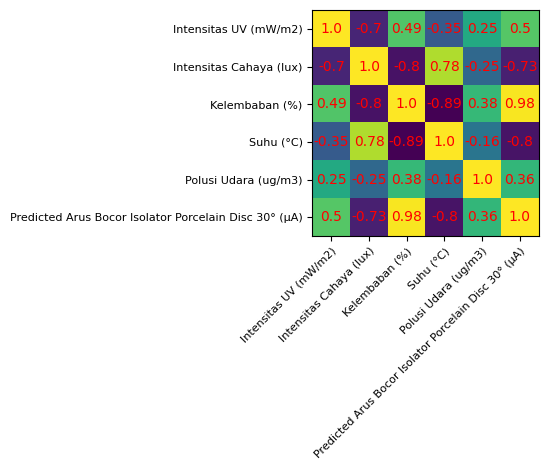

In [49]:
corr_30 = df_scatter_30.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr_30.values)

ax.set_xticks(np.arange(len(corr_30.columns)))
ax.set_yticks(np.arange(len(corr_30.columns)))
ax.set_xticklabels(corr_30.columns, fontsize=8)
ax.set_yticklabels(corr_30.columns, fontsize=8)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

for i in range(len(corr_30.columns)):
    for j in range(len(corr_30.columns)):
        text = ax.text(j, i, np.around(corr_30.iloc[i, j], decimals=2), ha="center", va="center", color="red", fontsize=10)
plt.tight_layout()
# plt.savefig("heatmap.png", bbox_inches = 'tight', dpi=300)
plt.show()

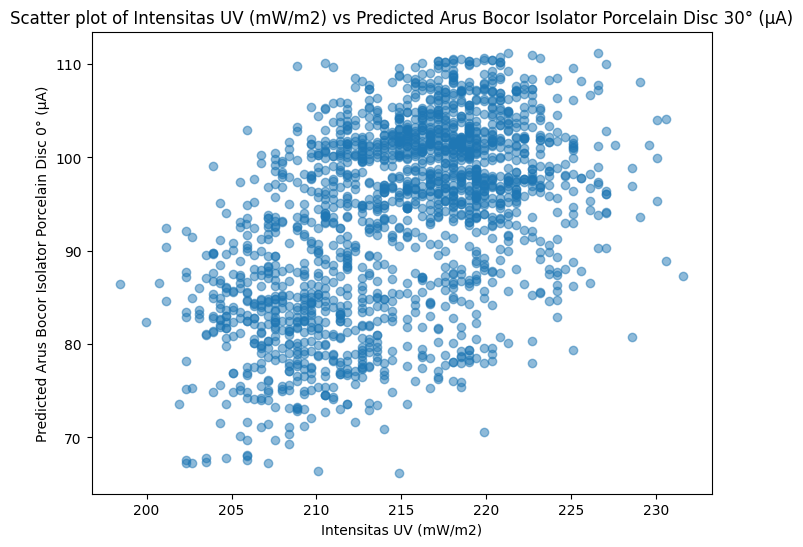

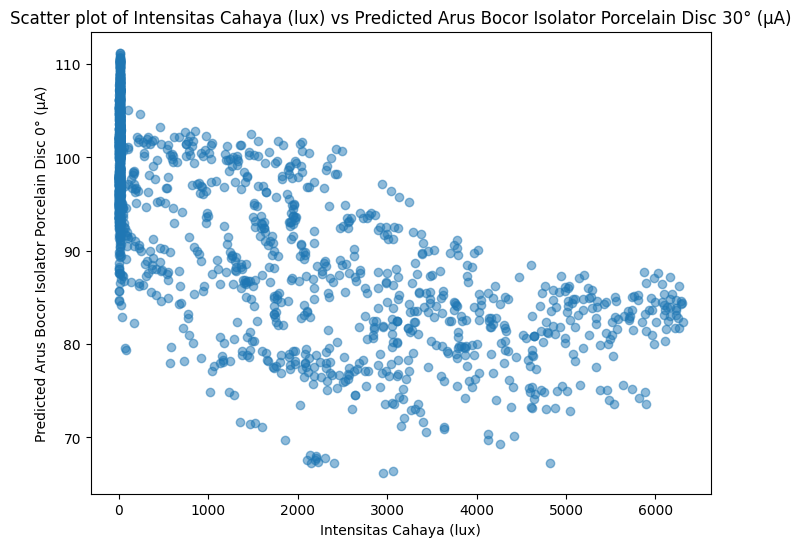

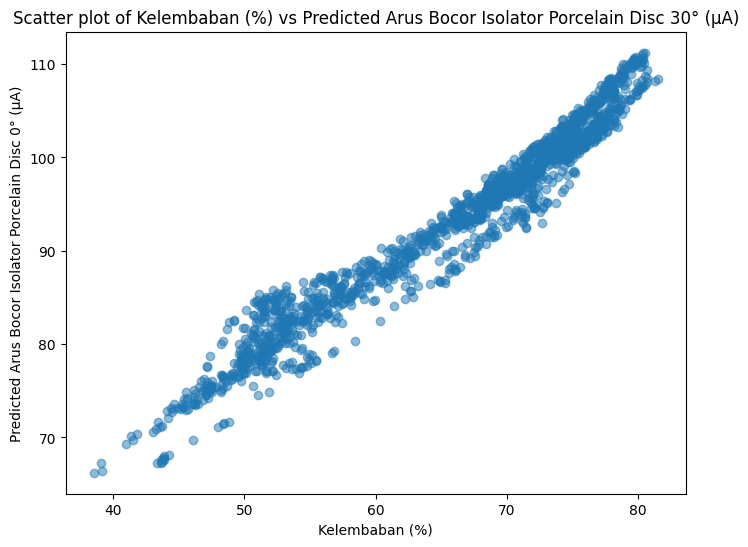

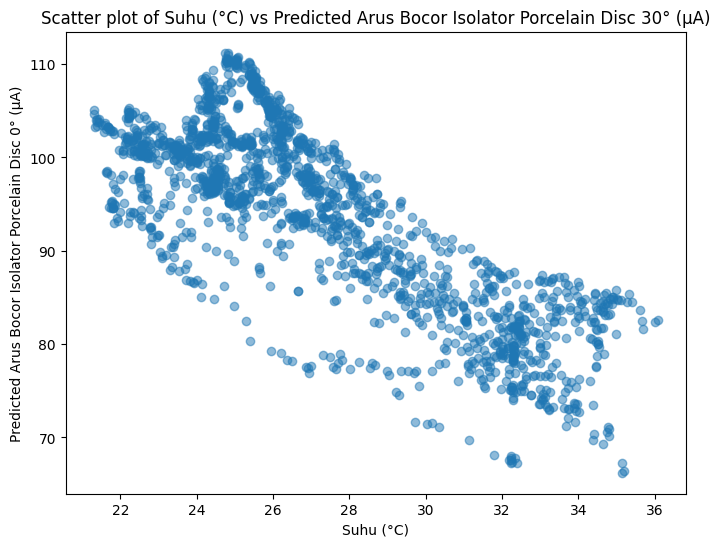

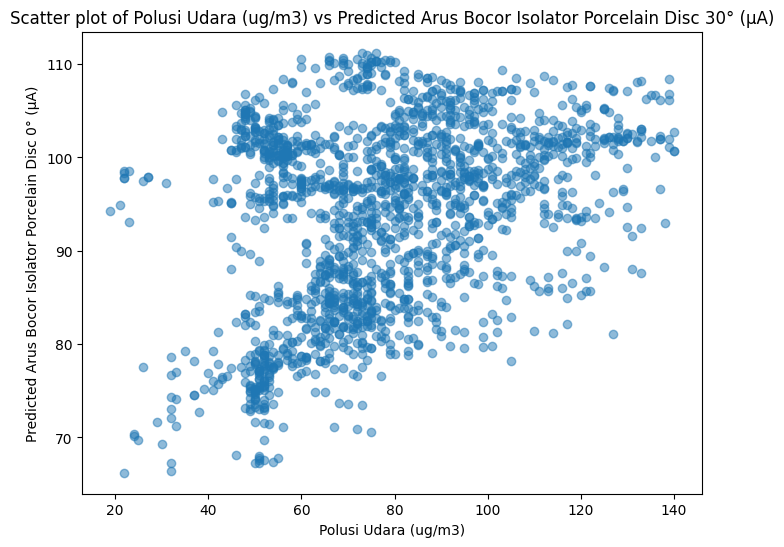

In [50]:
# Membuat scatter plot untuk tiap faktor
factors_30 = ['Intensitas UV (mW/m2)', 'Intensitas Cahaya (lux)', 'Kelembaban (%)', 'Suhu (°C)', 'Polusi Udara (ug/m3)']
for factor in factors_30:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scatter_30[factor], df_scatter_30['Predicted Arus Bocor Isolator Porcelain Disc 30° (µA)'], alpha=0.5)
    plt.title(f'Scatter plot of {factor} vs Predicted Arus Bocor Isolator Porcelain Disc 30° (µA)')
    plt.xlabel(factor)
    plt.ylabel('Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)')
    plt.show()

## Tegangan Bocor Isolator Porcelain Disc 60° (V)

In [51]:
# Split data menjadi train dan test

to_drop = df_processing.columns[0:4].tolist()
to_drop.extend(df_processing.columns[9:16])
x_60 = df_processing.drop(to_drop, axis=1)
y_60 = df_processing['Arus Bocor Isolator Porcelain Disc 60° (µA)']

xtrain_60,xtest_60,ytrain_60,ytest_60 = train_test_split(
    x_60,
    y_60,
    test_size=0.2
)

xtrain_60.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  \
4542                  218.96                        0           68.62   
10073                 219.42                        7           76.31   
9132                  219.42                     1192           53.36   
2016                  215.33                        7           70.75   
8109                  214.88                       53           71.04   

       Suhu (°C)  Polusi Udara (ug/m3)  
4542       28.01                   106  
10073      24.46                   125  
9132       31.33                    67  
2016       25.16                    77  
8109       22.94                   122

In [52]:
ytrain_60

4542      89.0
10073    112.5
9132      85.5
2016      95.5
8109     102.5
         ...  
8019     102.5
9765     106.0
1053      82.0
2036     105.0
2152      83.0
Name: Arus Bocor Isolator Porcelain Disc 60° (µA), Length: 7116, dtype: float64

In [53]:
# Regresi Linier
model_60 = LinearRegression()

# Inisialisasi model_60 Regresi Linier
model_60.fit(xtrain_60, ytrain_60)

# Lakukan prediksi pada set pengujian
predictions_60 = model_60.predict(xtest_60)

# Hitung nilai RMSE_60
rmse_60 = mean_squared_error(ytest_60, predictions_60, squared=False)

# Hitung nilai MAE_60
mae_60 = mean_absolute_error(ytest_60, predictions_60)

# Hitung nilai MAPE_60
mape_60 = mean_absolute_percentage_error(ytest_60, predictions_60)

# Tampilkan hasil evaluasi
print(f'RMSE_60: {rmse_60}')
print(f'MAE_60: {mae_60}')
print(f'MAPE_60: {mape_60}')

RMSE_60: 5.164413446280271
MAE_60: 4.084269574342724
MAPE_60: 0.04355987137250392


In [54]:
print('R squared: {:.2f}'.format(model.score(x_60,y_60)*100))

R squared: 77.03


In [55]:
df_results_60 = pd.DataFrame({'Actual': ytest_60, 'Predicted': predictions_60})

df_results_60

Actual   Predicted
4023   106.5  106.575886
1703   105.0  106.391632
7140    91.5   98.244195
1371    91.5   94.281912
9003    98.0   96.821984
...      ...         ...
5011    84.5   94.429822
2894    99.0   98.947943
2830    98.0  102.450356
6555    87.0   94.544862
914    107.5  103.853447

[1779 rows x 2 columns]

In [56]:
#Intercept and Coefficient
print("Intercept: ", model_60.intercept_)
print("Coefficients:")
list(zip(x_60, model_60.coef_))

Intercept:  -46.27376739224562
Coefficients:


[('Intensitas UV (mW/m2)', 0.10534246205792266),
 ('Intensitas Cahaya (lux)', 0.0007604428612191824),
 ('Kelembaban (%)', 1.4074866738940985),
 ('Suhu (°C)', 1.0221530805230452),
 ('Polusi Udara (ug/m3)', -0.04704577447339552)]

In [57]:
df_predictions_60 = pd.DataFrame(predictions_60, columns=['Predicted Arus Bocor Isolator Porcelain Disc 60° (µA)'])

df_scatter_60 = pd.concat([xtest_60, df_predictions_60], axis=1)

xtest_60.reset_index(drop=True, inplace=True)

df_scatter_60 = pd.concat([xtest_60, df_predictions_60], axis=1)

df_scatter_60.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
0                 217.58                        7           76.70      25.82   
1                 224.14                        7           75.85      25.95   
2                 223.18                        7           70.59      27.07   
3                 217.58                        0           65.60      28.76   
4                 214.44                      411           72.85      21.74   

   Polusi Udara (ug/m3)  Predicted Arus Bocor Isolator Porcelain Disc 60° (µA)  
0                    94                                         106.575886      
1                    90                                         106.391632      
2                   128                                          98.244195      
3                    87                                          94.281912      
4                    97                                          96.821984

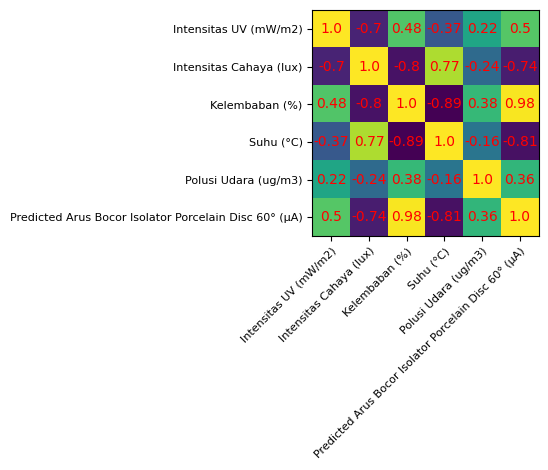

In [58]:
corr_60 = df_scatter_60.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr_60.values)

ax.set_xticks(np.arange(len(corr_60.columns)))
ax.set_yticks(np.arange(len(corr_60.columns)))
ax.set_xticklabels(corr_60.columns, fontsize=8)
ax.set_yticklabels(corr_60.columns, fontsize=8)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

for i in range(len(corr_60.columns)):
    for j in range(len(corr_60.columns)):
        text = ax.text(j, i, np.around(corr_60.iloc[i, j], decimals=2), ha="center", va="center", color="red", fontsize=10)
plt.tight_layout()
# plt.savefig("heatmap.png", bbox_inches = 'tight', dpi=300)
plt.show()

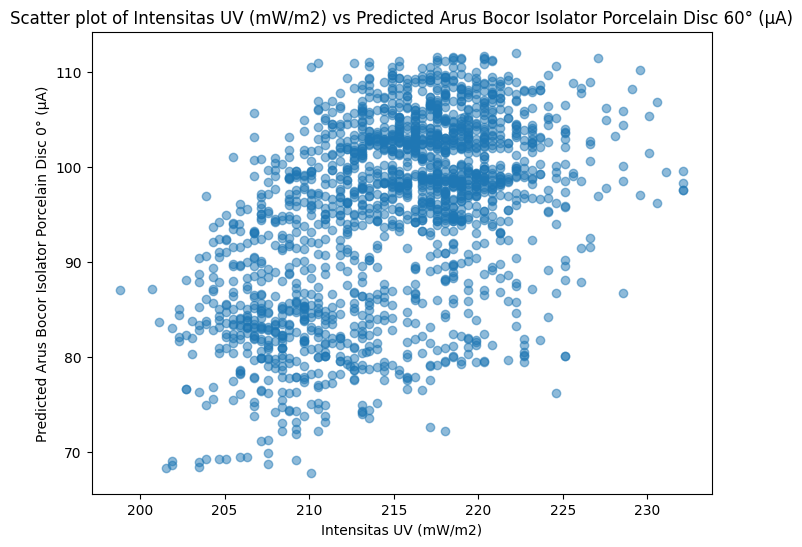

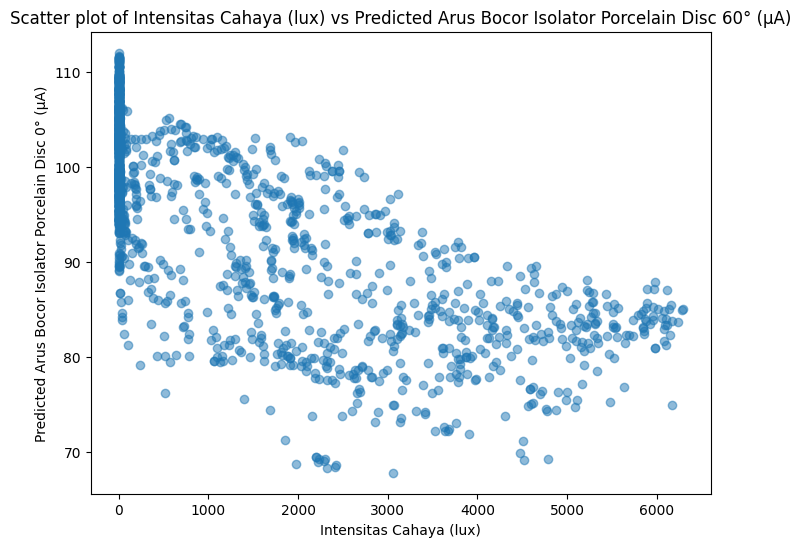

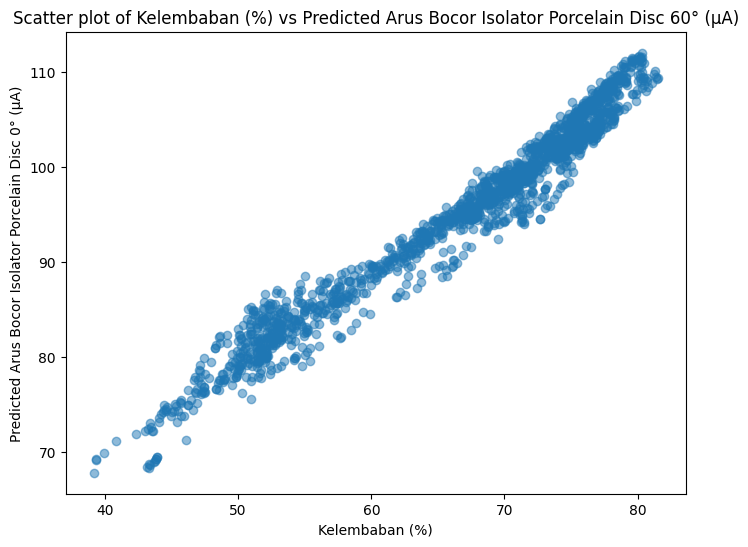

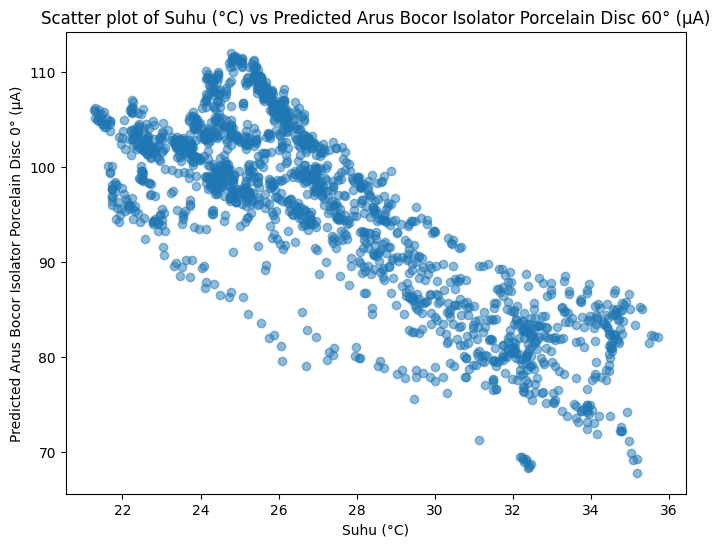

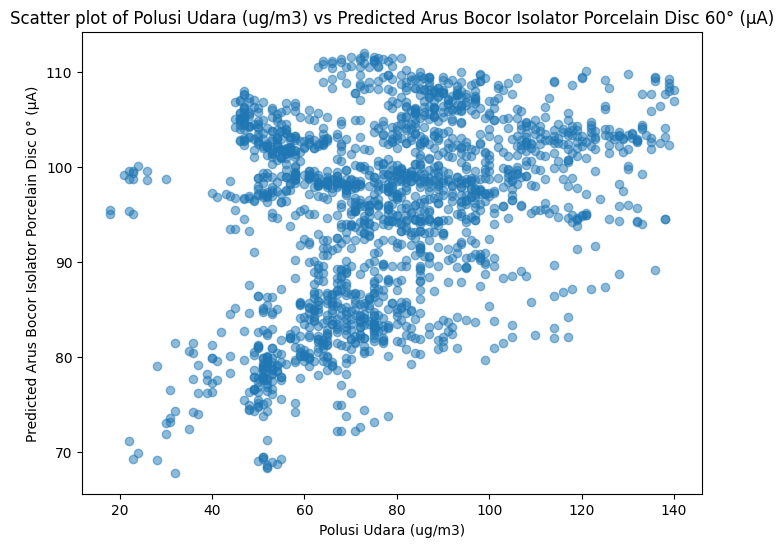

In [59]:
# Membuat scatter plot untuk tiap faktor
factors_60 = ['Intensitas UV (mW/m2)', 'Intensitas Cahaya (lux)', 'Kelembaban (%)', 'Suhu (°C)', 'Polusi Udara (ug/m3)']
for factor in factors_60:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scatter_60[factor], df_scatter_60['Predicted Arus Bocor Isolator Porcelain Disc 60° (µA)'], alpha=0.5)
    plt.title(f'Scatter plot of {factor} vs Predicted Arus Bocor Isolator Porcelain Disc 60° (µA)')
    plt.xlabel(factor)
    plt.ylabel('Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)')
    plt.show()

## Tegangan Bocor Isolator Porcelain Disc 90° (V)

In [60]:
# Split data menjadi train dan test

to_drop = df_processing.columns[0:4].tolist()
to_drop.extend(df_processing.columns[9:16])
x_90 = df_processing.drop(to_drop, axis=1)
y_90 = df_processing['Arus Bocor Isolator Porcelain Disc 90° (µA)']

xtrain_90,xtest_90,ytrain_90,ytest_90 = train_test_split(
    x_90,
    y_90,
    test_size=0.2
)

xtrain_90.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  \
8897                 220.81                        7           74.77   
3270                 210.95                     2007           68.25   
7195                 224.62                        7           76.45   
9999                 222.70                      907           55.84   
3599                 212.68                     3679           51.74   

      Suhu (°C)  Polusi Udara (ug/m3)  
8897      25.42                   111  
3270      26.17                    84  
7195      24.66                   124  
9999      31.06                    77  
3599      32.86                    93

In [61]:
ytrain_90

8897    107.5
3270     85.5
7195    111.0
9999     85.5
3599     83.0
        ...  
3715    103.5
1858     83.0
8599    105.0
2507     84.5
1285     83.0
Name: Arus Bocor Isolator Porcelain Disc 90° (µA), Length: 7116, dtype: float64

In [62]:
# Regresi Linier
model_90 = LinearRegression()

# Inisialisasi model_90 Regresi Linier
model_90.fit(xtrain_90, ytrain_90)

# Lakukan prediksi pada set pengujian
predictions_90 = model_90.predict(xtest_90)

# Hitung nilai RMSE_90
rmse_90 = mean_squared_error(ytest_90, predictions_90, squared=False)

# Hitung nilai MAE_90
mae_90 = mean_absolute_error(ytest_90, predictions_90)

# Hitung nilai MAPE_90
mape_90 = mean_absolute_percentage_error(ytest_90, predictions_90)

# Tampilkan hasil evaluasi
print(f'RMSE_90: {rmse_90}')
print(f'MAE_90: {mae_90}')
print(f'MAPE_90: {mape_90}')

RMSE_90: 5.559273734722898
MAE_90: 4.334913510163864
MAPE_90: 0.046608422765751806


In [63]:
print('R squared: {:.2f}'.format(model.score(x_90,y_90)*100))

R squared: 76.25


In [64]:
df_results_90 = pd.DataFrame({'Actual': ytest_90, 'Predicted': predictions_90})

df_results_90

Actual   Predicted
3995   106.5  103.169082
8758    84.5   78.982239
6144    91.5   98.589447
6973    60.0  103.907090
1172   113.5  106.591155
...      ...         ...
6996   100.0  103.509382
9062    84.5   78.997852
7489   110.0  104.713475
9287    95.5   96.776130
3648    83.0   84.320922

[1779 rows x 2 columns]

In [65]:
#Intercept and Coefficient
print("Intercept: ", model_90.intercept_)
print("Coefficients:")
list(zip(x_90, model_90.coef_))

Intercept:  -50.10203060374924
Coefficients:


[('Intensitas UV (mW/m2)', 0.11631960135204587),
 ('Intensitas Cahaya (lux)', 0.0008086841665687523),
 ('Kelembaban (%)', 1.432753069706165),
 ('Suhu (°C)', 1.0188208607398308),
 ('Polusi Udara (ug/m3)', -0.04707489371731394)]

In [66]:
df_predictions_90 = pd.DataFrame(predictions_90, columns=['Predicted Arus Bocor Isolator Porcelain Disc 90° (µA)'])

df_scatter_90 = pd.concat([xtest_90, df_predictions_90], axis=1)

xtest_90.reset_index(drop=True, inplace=True)

df_scatter_90 = pd.concat([xtest_90, df_predictions_90], axis=1)

df_scatter_90.head()

Intensitas UV (mW/m2)  Intensitas Cahaya (lux)  Kelembaban (%)  Suhu (°C)  \
0                 218.96                        7           73.77      26.73   
1                 211.82                     1910           53.94      27.64   
2                 206.75                     2259           70.21      24.63   
3                 218.96                        7           75.15      22.88   
4                 217.58                        7           77.22      22.53   

   Polusi Udara (ug/m3)  Predicted Arus Bocor Isolator Porcelain Disc 90° (µA)  
0                   109                                         103.169082      
1                    54                                          78.982239      
2                    61                                          98.589447      
3                    52                                         103.907090      
4                    47                                         106.591155

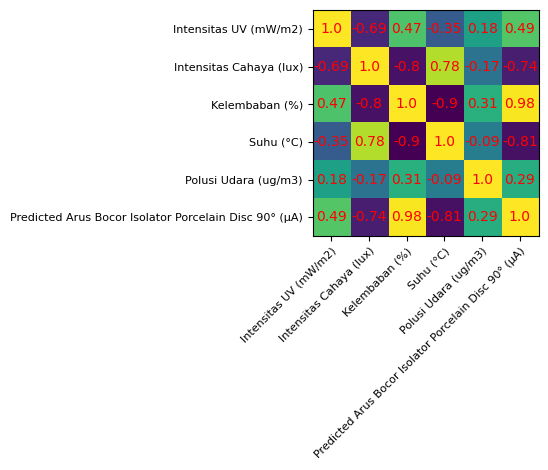

In [67]:
corr_90 = df_scatter_90.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr_90.values)

ax.set_xticks(np.arange(len(corr_90.columns)))
ax.set_yticks(np.arange(len(corr_90.columns)))
ax.set_xticklabels(corr_90.columns, fontsize=8)
ax.set_yticklabels(corr_90.columns, fontsize=8)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

for i in range(len(corr_90.columns)):
    for j in range(len(corr_90.columns)):
        text = ax.text(j, i, np.around(corr_90.iloc[i, j], decimals=2), ha="center", va="center", color="red", fontsize=10)
plt.tight_layout()
# plt.savefig("heatmap.png", bbox_inches = 'tight', dpi=300)
plt.show()

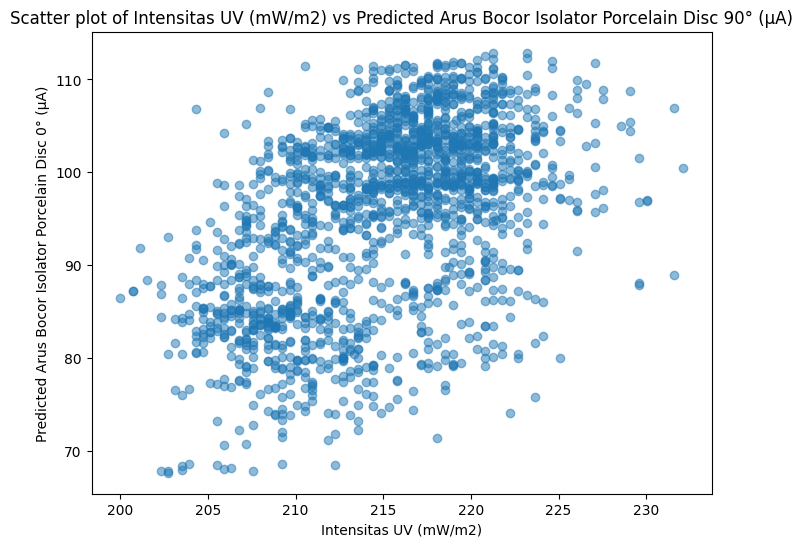

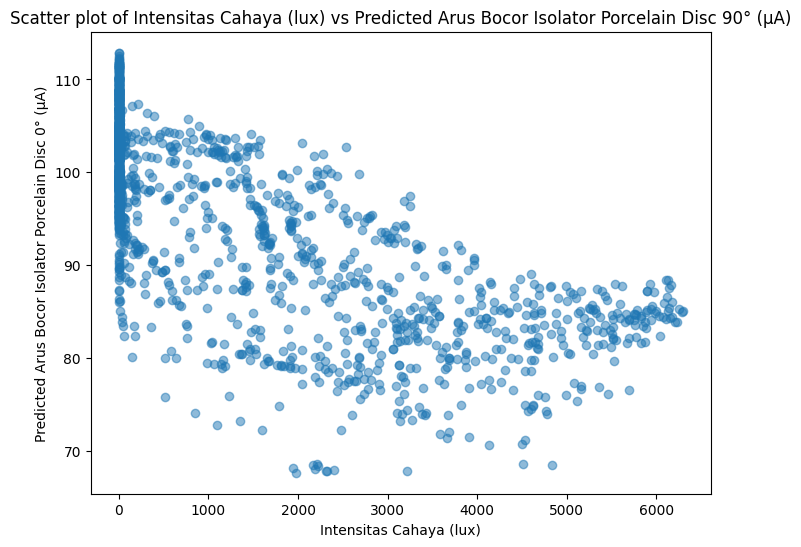

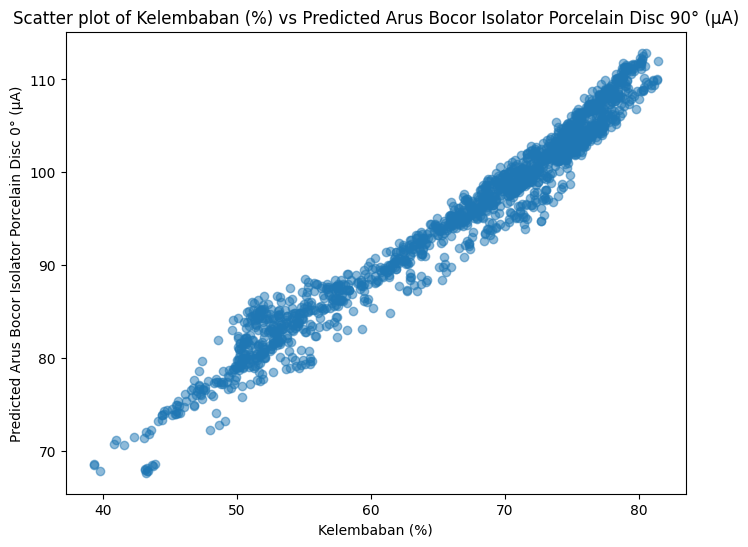

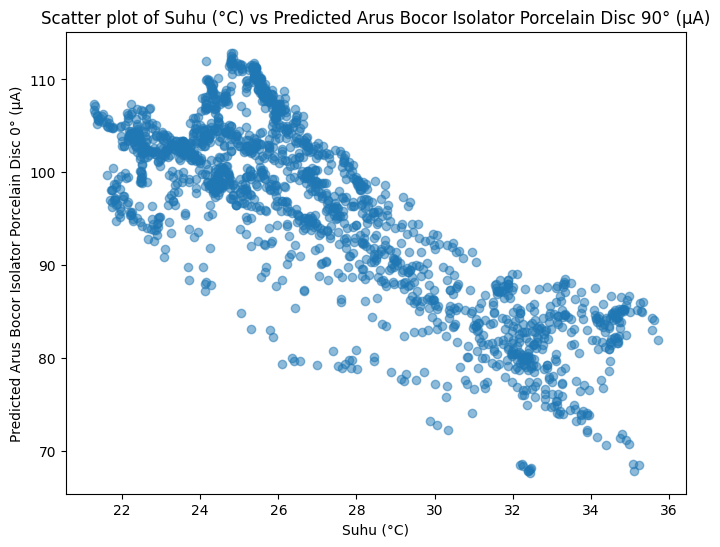

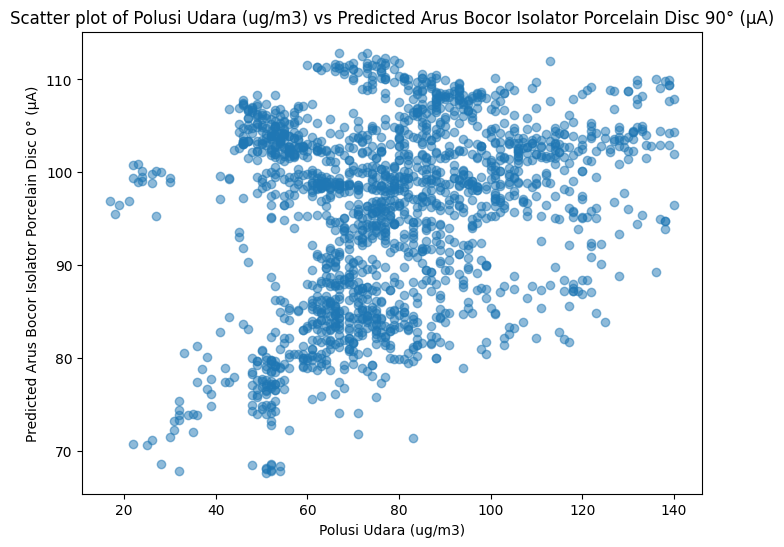

In [68]:
# Membuat scatter plot untuk tiap faktor
factors_90 = ['Intensitas UV (mW/m2)', 'Intensitas Cahaya (lux)', 'Kelembaban (%)', 'Suhu (°C)', 'Polusi Udara (ug/m3)']
for factor in factors_90:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scatter_90[factor], df_scatter_90['Predicted Arus Bocor Isolator Porcelain Disc 90° (µA)'], alpha=0.5)
    plt.title(f'Scatter plot of {factor} vs Predicted Arus Bocor Isolator Porcelain Disc 90° (µA)')
    plt.xlabel(factor)
    plt.ylabel('Predicted Arus Bocor Isolator Porcelain Disc 0° (µA)')
    plt.show()

## HIPOTESIS

1. Dapat terlihat dari *scatter plot* dan *heatmap plot* pada masing-masing jenis isolator, bahwa faktor yang paling berpengaruh terhadap kebocoran arus isolator secara berurutan adalah tingkat kelembaban, intensitas UV, dan polusi udara.